# Predicting Recipe Popularity: An Analysis of Site Traffic Data

## Introduction

In today's competitive digital landscape, predicting consumer behavior is crucial for maximizing engagement and driving business growth. For a company dedicated to providing culinary inspiration and meal planning services, selecting the right recipes to feature on the homepage is a key factor in attracting site traffic and increasing subscriptions.

The objective of this report is to analyze recipe site traffic data and develop a predictive model that identifies which recipes are likely to drive high traffic when featured. The product team has set an ambitious goal: to correctly predict high-traffic recipes 80% of the time. While this is a challenging target, this report aims to explore various approaches to achieve the best possible outcome within the given timeframe.

This report will detail the steps taken to validate and clean the provided data, perform exploratory analysis, develop predictive models, and evaluate their performance. Additionally, a business metric will be defined to monitor the effectiveness of the model in a real-world setting. Finally, recommendations will be provided to guide the next steps for Tasty Bytes in leveraging data-driven insights to optimize recipe selection and improve overall site performance.

# 1. Data Validation
### Overview
In this section, I will describe the validation and cleaning steps applied to each column in the dataset.

The dataset contained 947 rows and 8 columns. After validating all variables, several changes were made to clean the data: missing values were removed from the nutritional value columns (calories, carbohydrate, sugar, and protein), and the target variable (`high_traffic`) was binary encoded to replace null values.

### Summary of Validation and Cleaning Steps

1. **`recipe`:**
   - **Validation:** 947 unique values, no missing values.
   - **Action:** No cleaning needed as the data matches the description.

2. **`calories`:**
   - **Validation:** Numeric values as expected, with 52 missing values.
   - **Action:** Missing values were handled during the nutritional value cleaning process (details below).

3. **`carbohydrate`:**
   - **Validation:** Numeric values as expected, with 52 missing values.
   - **Action:** Missing values were handled during the nutritional value cleaning process (details below).

4. **`sugar`:**
   - **Validation:** Numeric values as expected, with 52 missing values.
   - **Action:** Missing values were handled during the nutritional value cleaning process (details below).

5. **`protein`:**
   - **Validation:** Numeric values as expected, with 52 missing values.
   - **Action:** Missing values were handled during the nutritional value cleaning process (details below).

6. **`category`:**
   - **Validation:** 11 unique categories were provided, though only 10 were specified in the data dictionary. The discrepancy was due to both 'Chicken' and 'Chicken Breast' being listed as categories.
   - **Action:** The incorrect 'Chicken Breast' category was merged with 'Chicken' to match the data dictionary. The data type was updated to categorical. There were no missing values.

7. **`servings`:**
   - **Validation:** Some values were not imported as numeric due to entries ending with 'as a snack'.
   - **Action:** The 'as a snack' entries were cleaned by removing the text, and the data type was updated to integer as specified in the data dictionary. There were no missing values.

8. **`high_traffic`:**
   - **Validation:** Verified that 'High' traffic entries matched the data dictionary. Missing values indicated non-high traffic.
   - **Action:** The column was binary encoded, with 1 representing 'High' traffic and 0 representing 'Non-High' traffic. The data type was updated to integer, and after encoding, there were no missing values, with all values falling within the range of 0 or 1.

### Nutritional Value Cleaning

The nutritional value columns (`calories`, `carbohydrate`, `sugar`, and `protein`) had missing values that were addressed as follows:

- **Missing Values Handling:** The 52 missing entries in each of these columns were removed to ensure data consistency and accuracy.

These steps ensured that the dataset was clean, consistent, and ready for further analysis and modeling.

In [1]:
# Importing necessary libraries

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and handling arrays
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization

from scipy.stats import ks_2samp, pointbiserialr  # For statistical tests and correlation measures
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold  # For model evaluation and hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, MinMaxScaler  # For data preprocessing
from sklearn.compose import ColumnTransformer  # For combining multiple preprocessing steps
from sklearn.pipeline import Pipeline  # For creating machine learning pipelines
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.ensemble import RandomForestClassifier  # For classification using Random Forest
from sklearn.linear_model import LogisticRegression  # For classification using Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score  # For model evaluation metrics

### Data Overview

In [2]:
# Load the dataset
df = pd.read_csv("recipe_site_traffic_2212.csv")

# Display the shape of the dataframe to understand its dimensions
print(df.shape)

# Show the first few rows of the dataframe to get a glimpse of the data
df.head()


(947, 8)


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


The dataset was loaded into a pandas DataFrame from the CSV file `recipe_site_traffic_2212.csv`.

- **Shape of the DataFrame**: The dataset comprises 947 rows and 8 columns. This gives an overview of the dataset's size and the number of features available for analysis.

- **Initial Data Preview**: The first few rows of the dataset were displayed to understand the structure and content of the data. This includes checking column names and initial values to get a preliminary sense of the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [4]:
df.describe(include='all')

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
count,947.000000,895.000000,895.000000,895.000000,895.000000,947,947,574
unique,NaN,NaN,NaN,NaN,NaN,11,6,1
top,NaN,NaN,NaN,NaN,NaN,Breakfast,4,High
freq,NaN,NaN,NaN,NaN,NaN,106,389,574
mean,474.000000,435.939196,35.069676,9.046547,24.149296,NaN,NaN,NaN
std,273.519652,453.020997,43.949032,14.679176,36.369739,NaN,NaN,NaN
min,1.000000,0.140000,0.030000,0.010000,0.000000,NaN,NaN,NaN
25%,237.500000,110.430000,8.375000,1.690000,3.195000,NaN,NaN,NaN
50%,474.000000,288.550000,21.480000,4.550000,10.800000,NaN,NaN,NaN
75%,710.500000,597.650000,44.965000,9.800000,30.200000,NaN,NaN,NaN


In [5]:
def validate_helper(df, col: str, unique_list: bool = True):
    """
    Prints basic information to help validate a column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    col (str): The name of the column to validate.
    unique_list (bool): Whether to print the list of unique values. Default is True.
    
    Returns:
    None
    """
    # Print the number of missing values in the specified column
    print(f'{col}:\nmissing values: {df[col].isna().sum()}')
    
    # Print the number of unique values in the specified column
    print(f'unique values: {df[col].nunique()}')
    
    # If requested, print the list of unique values
    if unique_list:
        print(f'unique value list: {df[col].unique()}')
    
    # Print a summary of statistics for the specified column
    print(df[col].describe())


In [6]:
# Validate the 'recipe' column
validate_helper(df, 'recipe', unique_list=False)

# Calculate the minimum and maximum values in the 'recipe' column
recipe_min = df['recipe'].min()
recipe_max = df['recipe'].max()

# Compute the expected sum of 'recipe' values if they are unique and sequential
recipe_expected_sum = (recipe_max - recipe_min + 1) * (recipe_min + recipe_max) / 2

# Compute the actual sum of 'recipe' values in the dataset
recipe_actual_sum = df['recipe'].sum()

# Check if the actual sum matches the expected sum to determine if 'recipe' is a unique identifier
if recipe_expected_sum == recipe_actual_sum:
    print("The 'recipe' column is a unique identifier.")
else:
    print("The 'recipe' column is NOT a unique identifier.")


recipe:
missing values: 0
unique values: 947
count    947.000000
mean     474.000000
std      273.519652
min        1.000000
25%      237.500000
50%      474.000000
75%      710.500000
max      947.000000
Name: recipe, dtype: float64
The 'recipe' column is a unique identifier.


Based on the statistical summary and the unique values check, the 'recipe' column is confirmed to be a unique identifier. This is supported by the fact that the actual sum of the 'recipe' values matches the expected sum for a unique and sequential range of values.

**Conclusion**: The 'recipe' column serves as a unique identifier, which is crucial for correctly linking and distinguishing between different recipes in the dataset.

### Validation and Cleaning of columns

- **'calories', 'carbohydrate', 'sugar', 'protein'**:
  - Each column was validated for missing values and unique values. Missing values were handled, and columns were checked for consistency.

- **'category'**:
  - Checked for unique values. Merged 'Chicken Breast' with 'Chicken' to ensure consistency and updated the data type to categorical.

- **'servings'**:
  - Validated and cleaned entries with 'as a snack'. Converted the column to integer type after removing non-numeric text.

- **'high_traffic'**:
  - Binary encoded the column, replacing 'High' with 1 and missing values with 0. Converted to integer type and verified no missing values remain.

- **Final Data Preparation**:
  - Dropped rows with missing values in nutritional columns and created a cleaned dataset. Nutritional totals were to be computed, though this step is commented out in the code.

In [7]:
# validate 'calories'
validate_helper(df, 'calories', unique_list=False)

# look at n/a values
df[df['calories'].isna()]

calories:
missing values: 52
unique values: 891
count     895.000000
mean      435.939196
std       453.020997
min         0.140000
25%       110.430000
50%       288.550000
75%       597.650000
max      3633.160000
Name: calories, dtype: float64


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,NaN
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,NaN
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


In [8]:
# validate 'carbohydrate'
validate_helper(df, 'carbohydrate', unique_list=False)

carbohydrate:
missing values: 52
unique values: 835
count    895.000000
mean      35.069676
std       43.949032
min        0.030000
25%        8.375000
50%       21.480000
75%       44.965000
max      530.420000
Name: carbohydrate, dtype: float64


In [9]:
# validate 'sugar'
validate_helper(df, 'sugar', unique_list=False)

sugar:
missing values: 52
unique values: 666
count    895.000000
mean       9.046547
std       14.679176
min        0.010000
25%        1.690000
50%        4.550000
75%        9.800000
max      148.750000
Name: sugar, dtype: float64


In [10]:
# validate 'protein'
validate_helper(df, 'protein', unique_list=False)

protein:
missing values: 52
unique values: 772
count    895.000000
mean      24.149296
std       36.369739
min        0.000000
25%        3.195000
50%       10.800000
75%       30.200000
max      363.360000
Name: protein, dtype: float64


In [11]:
# validate 'category'
validate_helper(df, 'category', unique_list=True)

# query 'chicken_breast' and 'chicken'
count_before = df[df['category'].isin(['Chicken Breast', 'Chicken'])].shape[0]
print("count before modification:", count_before)

# clean 'chicken_breast'
df.loc[df['category'] == 'Chicken Breast', 'category'] = 'Chicken'
count_after = df[df['category'] == 'Chicken'].shape[0]
print("count after modification:", count_after)

# update dtype to categorical. 
df['category'] = df['category'].astype('category')
df['category'].dtype

category:
missing values: 0
unique values: 11
unique value list: ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
count           947
unique           11
top       Breakfast
freq            106
Name: category, dtype: object
count before modification: 172
count after modification: 172


CategoricalDtype(categories=['Beverages', 'Breakfast', 'Chicken', 'Dessert',
                  'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato',
                  'Vegetable'],
, ordered=False)

In [12]:
# validate 'servings'
validate_helper(df, 'servings', unique_list=True)

# servings has object datatype and 6 unique values, suggesting one or more are formatted incorrectly
df['servings'].unique

if pd.api.types.is_string_dtype(df['servings']):
    df[df['servings'].isin(['4 as a snack', '6 as a snack'])]

    # clean 'as a snack'
    df['servings'] = df['servings'].str.replace(' as a snack', '', regex=False)

    # change dtype
    df['servings'] = df['servings'].astype(int)


servings:
missing values: 0
unique values: 6
unique value list: ['6' '4' '1' '2' '4 as a snack' '6 as a snack']
count     947
unique      6
top         4
freq      389
Name: servings, dtype: object


In [13]:
# validate high traffic
validate_helper(df,'high_traffic', unique_list=True)

# binary encode, replacing 'high' as 1, and missing values as 0. 
df['high_traffic'] = df['high_traffic'].replace('High', 1).fillna(0)

# verify no more missing values
print(f"missing values remaining: {df['high_traffic'].isna().sum()}")

# change dtype to int, to prepare for machine learning
df['high_traffic'] = df['high_traffic'].astype(int)

# check unique values
print(f"new unique values: {df['high_traffic'].unique()}")

high_traffic:
missing values: 373
unique values: 1
unique value list: ['High' nan]
count      574
unique       1
top       High
freq       574
Name: high_traffic, dtype: object
missing values remaining: 0
new unique values: [1 0]


In [14]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic
count,947.000000,895.000000,895.000000,895.000000,895.000000,947.000000,947.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296,3.477297,0.606125
std,273.519652,453.020997,43.949032,14.679176,36.369739,1.732741,0.488866
min,1.000000,0.140000,0.030000,0.010000,0.000000,1.000000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000,0.000000
50%,474.000000,288.550000,21.480000,4.550000,10.800000,4.000000,1.000000
75%,710.500000,597.650000,44.965000,9.800000,30.200000,4.000000,1.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000,1.000000


In [15]:
# drop missing values
cleaned_df = df.dropna(subset=['calories','carbohydrate','sugar','protein'])
cleaned_df.shape

(895, 8)

In [16]:
# create nutrional totals
nutrient_vals = ['calories','carbohydrate','sugar','protein']
"""
nutrient_vals_totals = ['calories_total','carbohydrate_total','sugar_total','protein_total']

for nut in nutrient_vals:
    cleaned_df[nut + '_total'] = cleaned_df[nut] * cleaned_df['servings']
"""
cleaned_df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,1
2,3,914.28,42.68,3.09,2.88,Breakfast,1,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,1
4,5,27.05,1.85,0.80,0.53,Beverages,4,0
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,1


This cleaning process ensured that the dataset is consistent and ready for further analysis and modeling.

### Investigation of Outliers by Category

To investigate potential outliers in nutritional values, the following steps were performed:

- **Z-Score Calculation**: Nutritional values (`calories`, `carbohydrate`, `sugar`, `protein`) were scaled using Z-scores within each recipe category. This standardization helps in identifying outliers by comparing each value to the category's mean and standard deviation.

- **Data Transformation**: The dataset was transformed into a long format using `melt` to facilitate plotting. This format includes the Z-scores and corresponding nutritional values for each category.

- **Plotting**: A box plot was generated to visualize the Z-scores of nutritional values across different categories. This plot allows for the identification of outliers and variations in nutritional values within each category.

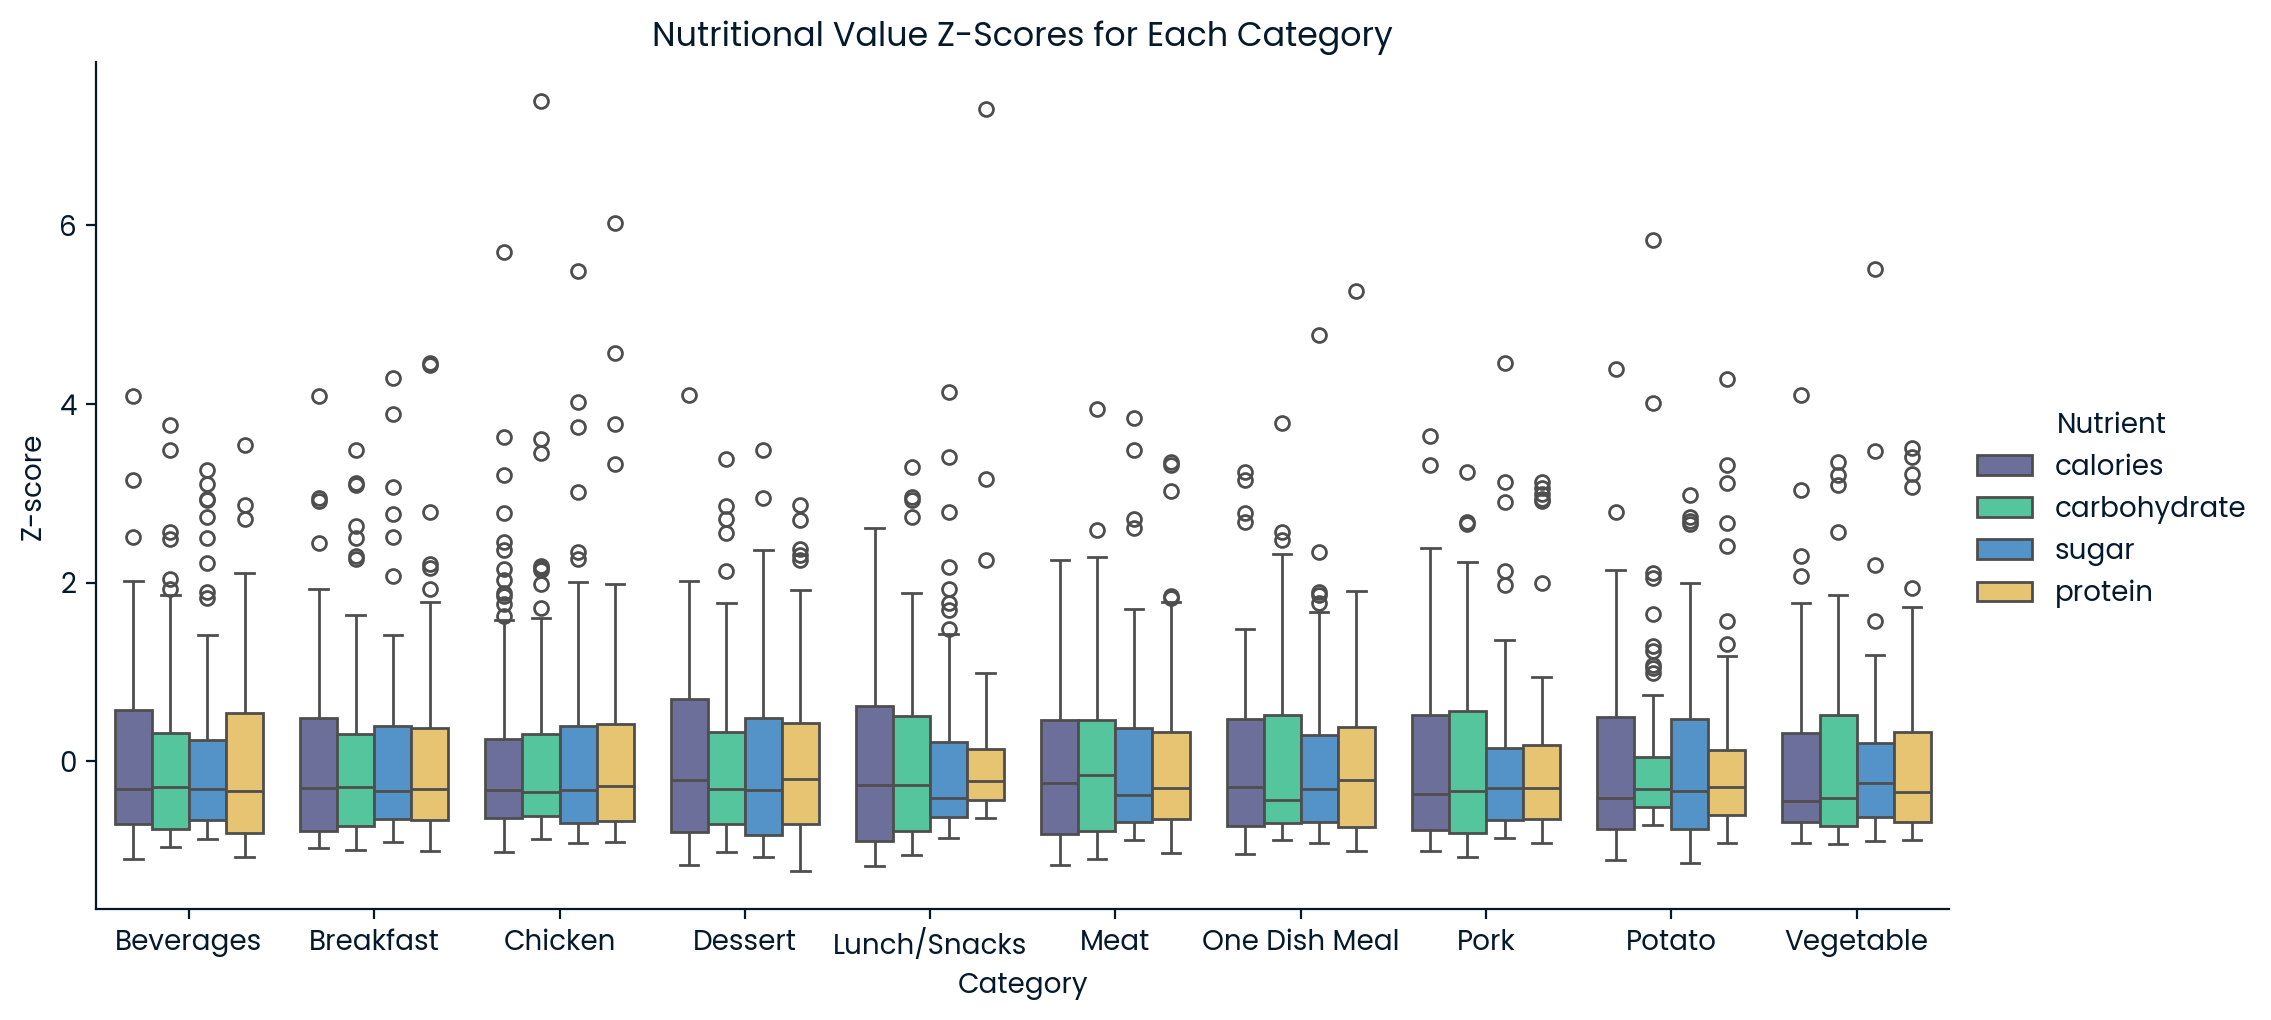

In [17]:
## investigate outliers, by category
def calculate_z_scores_by_category(group):
    """Calculates Z-score within each category"""
    return (group - group.mean()) / group.std()

# apply scaling within each category while preserving indexes
category_scaled_df = cleaned_df.groupby('category')[['calories', 'carbohydrate', 'sugar', 'protein']].transform(calculate_z_scores_by_category)

# add categorical data
category_scaled_df['category'] = cleaned_df['category']

# transform to long format for cat plot. 
melted_df = category_scaled_df.melt(id_vars=['category'], value_vars=['calories', 'carbohydrate', 'sugar', 'protein'], 
                                    var_name='Nutrient', value_name='Z-score')

# plot
g = sns.catplot(x='category', y='Z-score', hue='Nutrient', kind='box', data=melted_df, height=5, aspect=2)
g.set_xticklabels(rotation=0)
g.set_axis_labels("Category", "Z-score")
plt.title('Nutritional Value Z-Scores for Each Category')
plt.show()

**Plot Description**: The box plot displays Z-scores for each nutritional value across categories, highlighting the distribution and potential outliers. Categories with extreme Z-scores can indicate unusual values or outliers that may require further investigation.

### Outlier Removal Process

To remove outliers from the dataset, the following process was followed:

- **Outlier Detection**: For each category, the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for each nutritional value (`calories`, `carbohydrate`, `sugar`, `protein`) were calculated. Outliers were defined as data points falling outside the range of 1.5 times the IQR below Q1 or above Q3.

- **Filtering**: Data points exceeding these bounds were filtered out, and the cleaned data was aggregated back into a single DataFrame.

- **Proportion of Outliers**: The proportion of the dataset considered outliers was calculated. The result indicates that approximately 18.99% of the data points were removed as outliers.

In [18]:
## remove outliers based on calculated bounds per category

# empty dataframe for filtered data
filtered_df = pd.DataFrame()

# loop through each category
for cat in cleaned_df['category'].unique():
    category_data = cleaned_df[cleaned_df['category'] == cat]

    for col in nutrient_vals:
        # calculate Q1, Q3, and IQR
        Q1 = category_data[col].quantile(0.25)
        Q3 = category_data[col].quantile(0.75)
        IQR = Q3 - Q1

        # filter outliers based on bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        category_data = category_data[(category_data[col] >= lower_bound) & (category_data[col] <= upper_bound)]
        
    # append current category to filter_df
    filtered_df = pd.concat([filtered_df, category_data], ignore_index=True)

# print proportion of data set exceeds 1.5x IQR bounds
outlier_proportion = (cleaned_df.shape[0] - filtered_df.shape[0]) / cleaned_df.shape[0]
print(f"Proportion of Data Removed as Outliers: {outlier_proportion:.2%}")

Proportion of Data Removed as Outliers: 18.99%


This indicates that about 19% of the dataset was identified and removed as outliers based on the calculated bounds.

## Nutritional Value Cleaning

The cleaning process for the nutritional value columns (`calories`, `carbohydrate`, `sugar`, and `protein`) involved the following steps:

- **Handling Missing Values**: The dataset contained 52 rows with missing nutritional values. Since these missing values were not Missing Completely at Random (MCAR), imputing them could introduce bias. Consequently, these 52 records were removed to ensure data integrity.

- **Outlier Detection**: Outliers were identified in the nutritional value columns by calculating Z-scores within each `category` and determining values that fell outside of 1.5 times the interquartile range (IQR). It was found that approximately 19% of the dataset consisted of such outliers. Given the substantial proportion and the nature of these values (which did not appear to be input errors), they were retained without modification.

- **Further Exploration**: The distribution and impact of these nutritional values will be examined in greater detail during the Exploratory Analysis phase to understand their effects on the dataset and model performance.

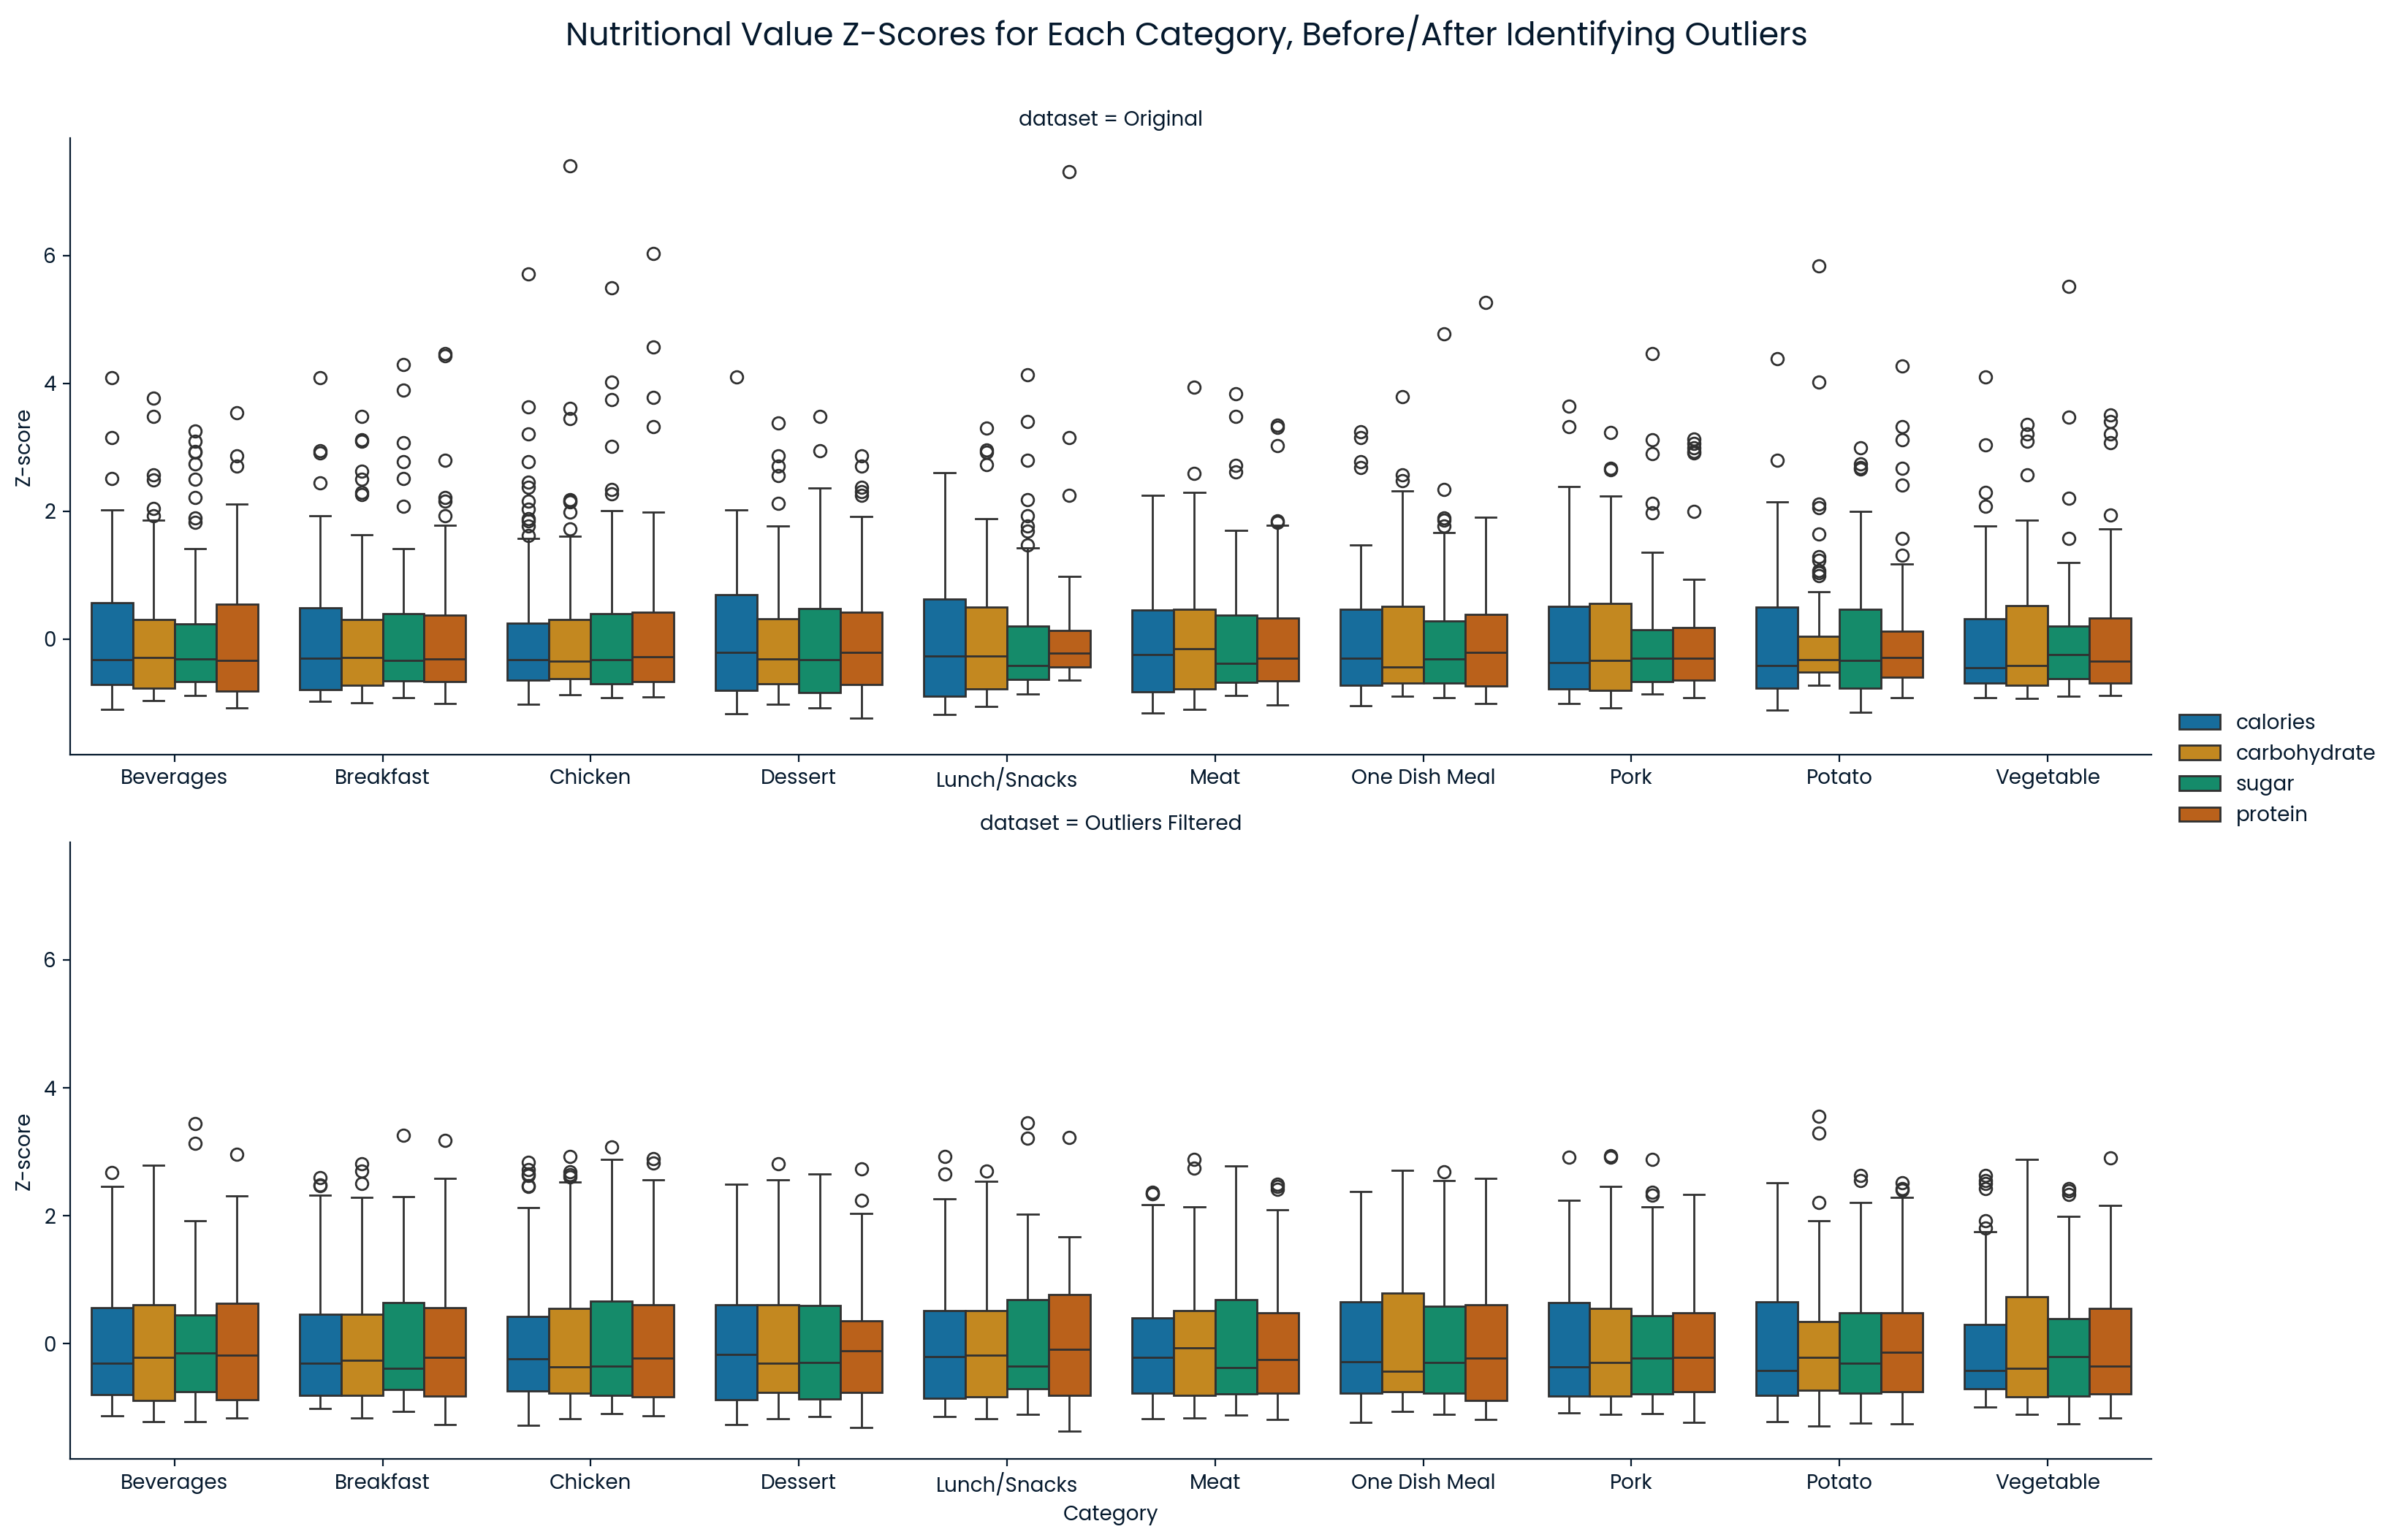

In [19]:
## updated this so bottom graph uses filtered_df instead of cleaned_df, since outliers are not being removed. 

# apply z-scores, per category
original_grouped_z_scores = df.groupby('category')[['calories', 'carbohydrate', 'sugar', 'protein']].transform(calculate_z_scores_by_category)
cleaned_grouped_z_scores = filtered_df.groupby('category')[['calories', 'carbohydrate', 'sugar', 'protein']].transform(calculate_z_scores_by_category)

# add 'category' column
original_grouped_z_scores['category'] = df['category']
cleaned_grouped_z_scores['category'] = filtered_df['category']

# melt the dataframes for plotting
original_melted = original_grouped_z_scores.melt(id_vars=['category'], value_vars=['calories', 'carbohydrate', 'sugar', 'protein'],
                                                 var_name='Nutrient', value_name='Z-score')
cleaned_melted = cleaned_grouped_z_scores.melt(id_vars=['category'], value_vars=['calories', 'carbohydrate', 'sugar', 'protein'],
                                               var_name='Nutrient', value_name='Z-score')
# concat data
data = pd.concat([original_melted.assign(dataset='Original'), cleaned_melted.assign(dataset='Outliers Filtered')], ignore_index=True)

# map boxplots to data
g = sns.FacetGrid(data, row="dataset", height=5, aspect=3, sharex=False) 
g.map_dataframe(sns.boxplot, x='category', y='Z-score', hue='Nutrient', palette='colorblind')
g.set_xticklabels(rotation=0)
g.set_axis_labels("Category", "Z-score")
g.add_legend()

g.fig.suptitle('Nutritional Value Z-Scores for Each Category, Before/After Identifying Outliers', fontsize=16, y=1.05)

plt.show()


The boxplots clearly demonstrate how the nutritional value distributions and Z-scores differ between the original dataset and the filtered dataset, providing insights into the effects of outlier removal.

## Post Data Cleaning

- **Remaining Entries**: After the data cleaning process, 895 entries remained in the dataset.

- **Distribution Analysis**: A two-sample Kolmogorov-Smirnov (KS) test was conducted to analyze the distribution of the target variable (`high_traffic`). This test confirmed that there was no statistically significant difference in the distribution of the target variable before and after data cleaning, indicating that the cleaning process did not introduce any bias or skew in the target variable's distribution.


In [20]:
# Determine if target variable distribution differs significantly due to removed outliers
ks_stat, ks_p = ks_2samp(df['high_traffic'], cleaned_df['high_traffic'])
if ks_p < 0.05:
    sig = 'The distributions are significantly different.'
else:
    sig = (
        "The p-value is significantly greater than the common threshold of 0.05, "
        "indicating that there is no statistical difference in the distribution of the "
        "target variable before and after outlier removal. Therefore, we conclude that the "
        "data cleaning process, including outlier removal, did not significantly alter the "
        "distribution of the `high_traffic` variable."
    )

print(f'KS Statistic (high_traffic): {ks_stat}, P-value: {ks_p}. \n\n{sig}')

KS Statistic (high_traffic): 0.008359240884179974, P-value: 0.9999999999999847. 

The p-value is significantly greater than the common threshold of 0.05, indicating that there is no statistical difference in the distribution of the target variable before and after outlier removal. Therefore, we conclude that the data cleaning process, including outlier removal, did not significantly alter the distribution of the `high_traffic` variable.


# 2. Exploratory Analysis

In this section, I investigated the target variable and features of the recipes, focusing on the relationship between the target variable (`high_traffic`) and the features. The following key insights and decisions were identified to prepare for modeling:

- **Protein**: The analysis revealed that `protein` is a statistically significant predictor for `high_traffic`. To better model its impact and handle skewed distributions, a log transformation was applied to the `protein` feature.

## Target Variable - High Traffic

The goal of this analysis is to predict instances of high traffic on the website, which is represented by the target variable `high_traffic`. 

- **Counts of High Traffic**: There were over 500 instances of high traffic in the dataset.
- **Counts of Normal Traffic**: Approximately 350 instances can be classified as normal traffic.

This distribution indicates an imbalance between the high traffic and normal traffic categories, which may need to be addressed in the modeling process to ensure effective prediction and avoid bias.

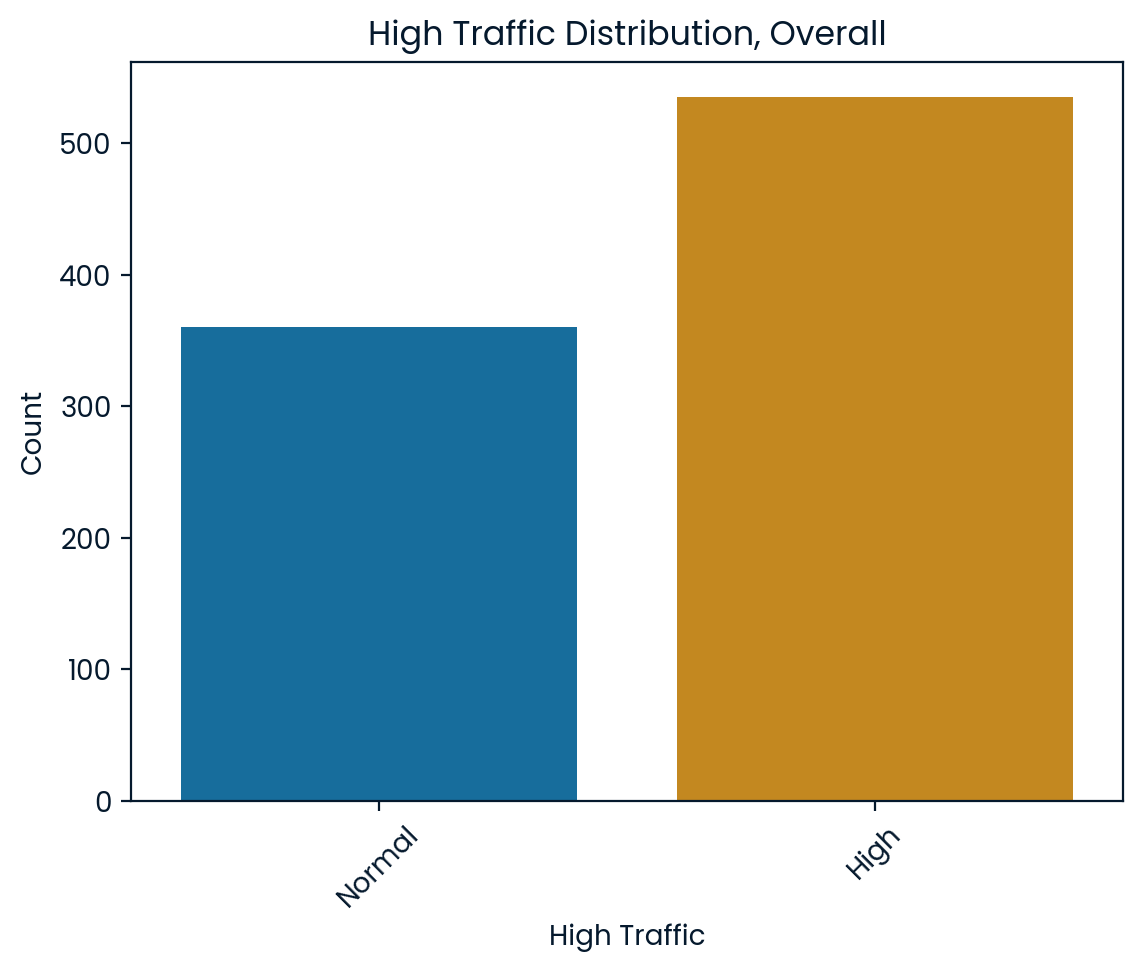

In [21]:
# overal count plot
sns.countplot(x='high_traffic', hue='high_traffic', data=cleaned_df, palette='colorblind', dodge=False)
plt.title('High Traffic Distribution, Overall')
plt.xticks(ticks=[0,1],labels=['Normal', 'High'], rotation=45)
plt.xlabel('High Traffic')
plt.ylabel('Count')
plt.legend().remove() 
plt.show()

### Target Variable Insights

- **(Left) Target Variable by Category**: This graph shows the distribution of the target variable `high_traffic` broken out by recipe category. It is evident that some categories more frequently produce high traffic, suggesting a potential relationship between the recipe’s category and the likelihood of high traffic.

- **(Right) Target Variable by Serving Size**: This graph displays the counts of the target variable `high_traffic` based on serving size. The analysis indicates that serving size does not have a strong relationship with the target variable, as the distribution appears relatively consistent across different serving sizes.


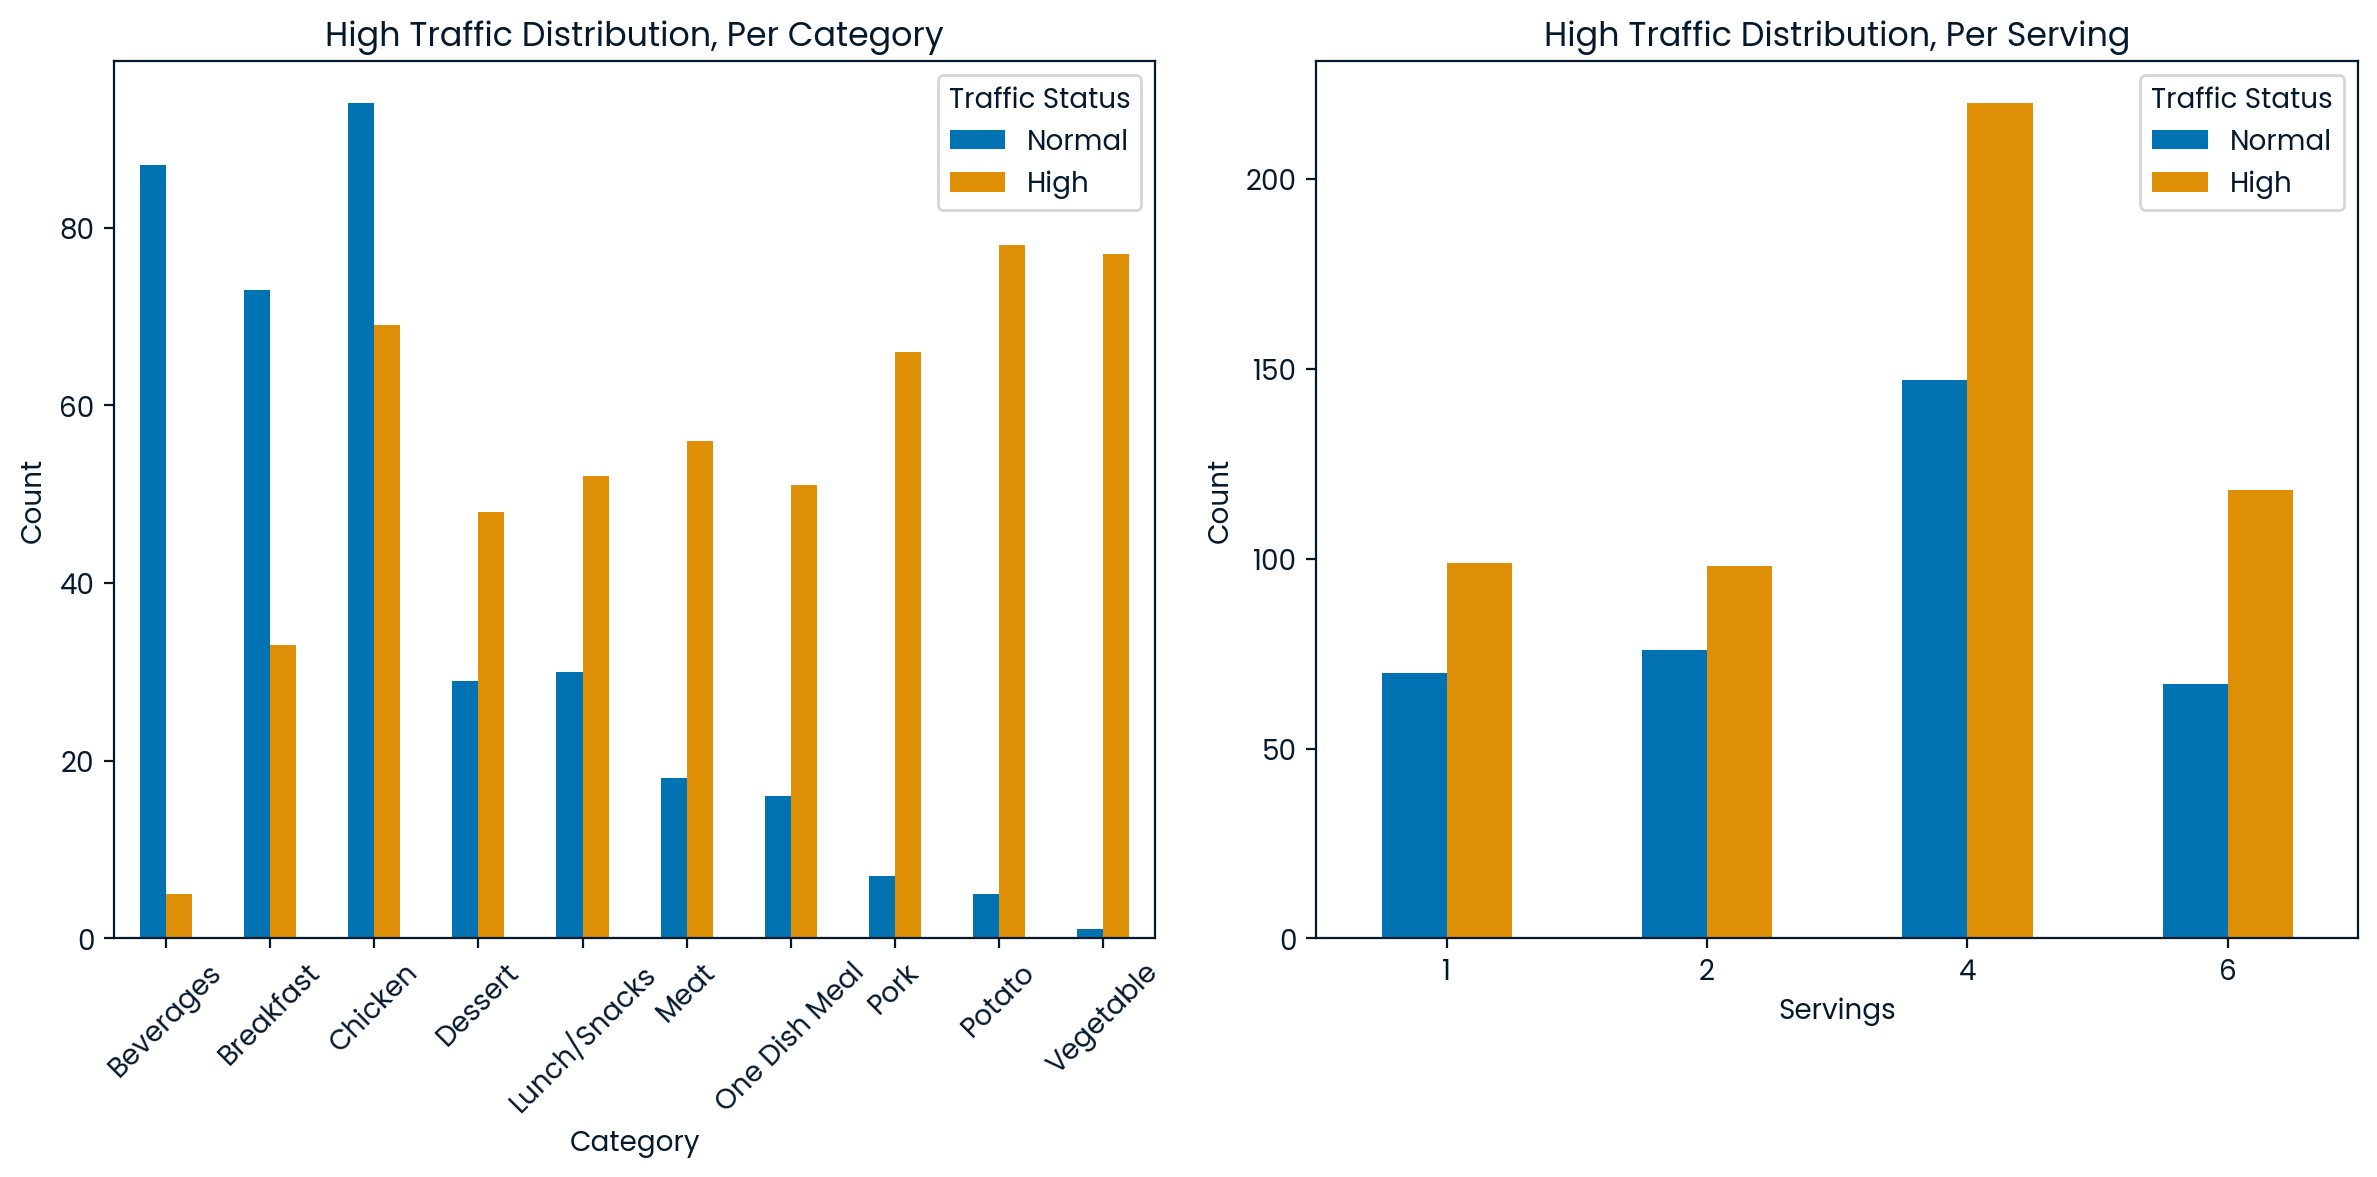

In [22]:
plt.figure(figsize=(12, 6))

# prepare data
category_counts = pd.crosstab(cleaned_df['category'], cleaned_df['high_traffic'])

# high traffic vs category
ax1 = plt.subplot(1, 2, 1)
category_counts.plot(kind='bar', color=sns.color_palette("colorblind"), stacked=False, ax=ax1)
plt.title('High Traffic Distribution, Per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Traffic Status', labels=['Normal', 'High'])

category_counts = pd.crosstab(cleaned_df['servings'], cleaned_df['high_traffic'])

# high traffic vs servings
ax2 = plt.subplot(1, 2, 2)
category_counts.plot(kind='bar', color=sns.color_palette("colorblind"), stacked=False, ax=ax2)
plt.title('High Traffic Distribution, Per Serving')
plt.xlabel('Servings')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Traffic Status', labels=['Normal', 'High'])


plt.tight_layout()
plt.show()

### Numeric Variables

The following plots illustrate the distributions of the numeric variables: Calories, Carbohydrate, Sugar, and Protein.

- **Histograms**: The histograms display the distribution of each numeric variable. These plots help in understanding the frequency of different values and identifying any skewness in the data.

- **Boxplots**: The boxplots provide a summary of the distributions, including the median, quartiles, and potential outliers for each numeric variable. These plots are useful for detecting any anomalies or variations within the data.

By examining these plots, we gain insights into the spread and central tendencies of the numeric variables, which are crucial for subsequent modeling.

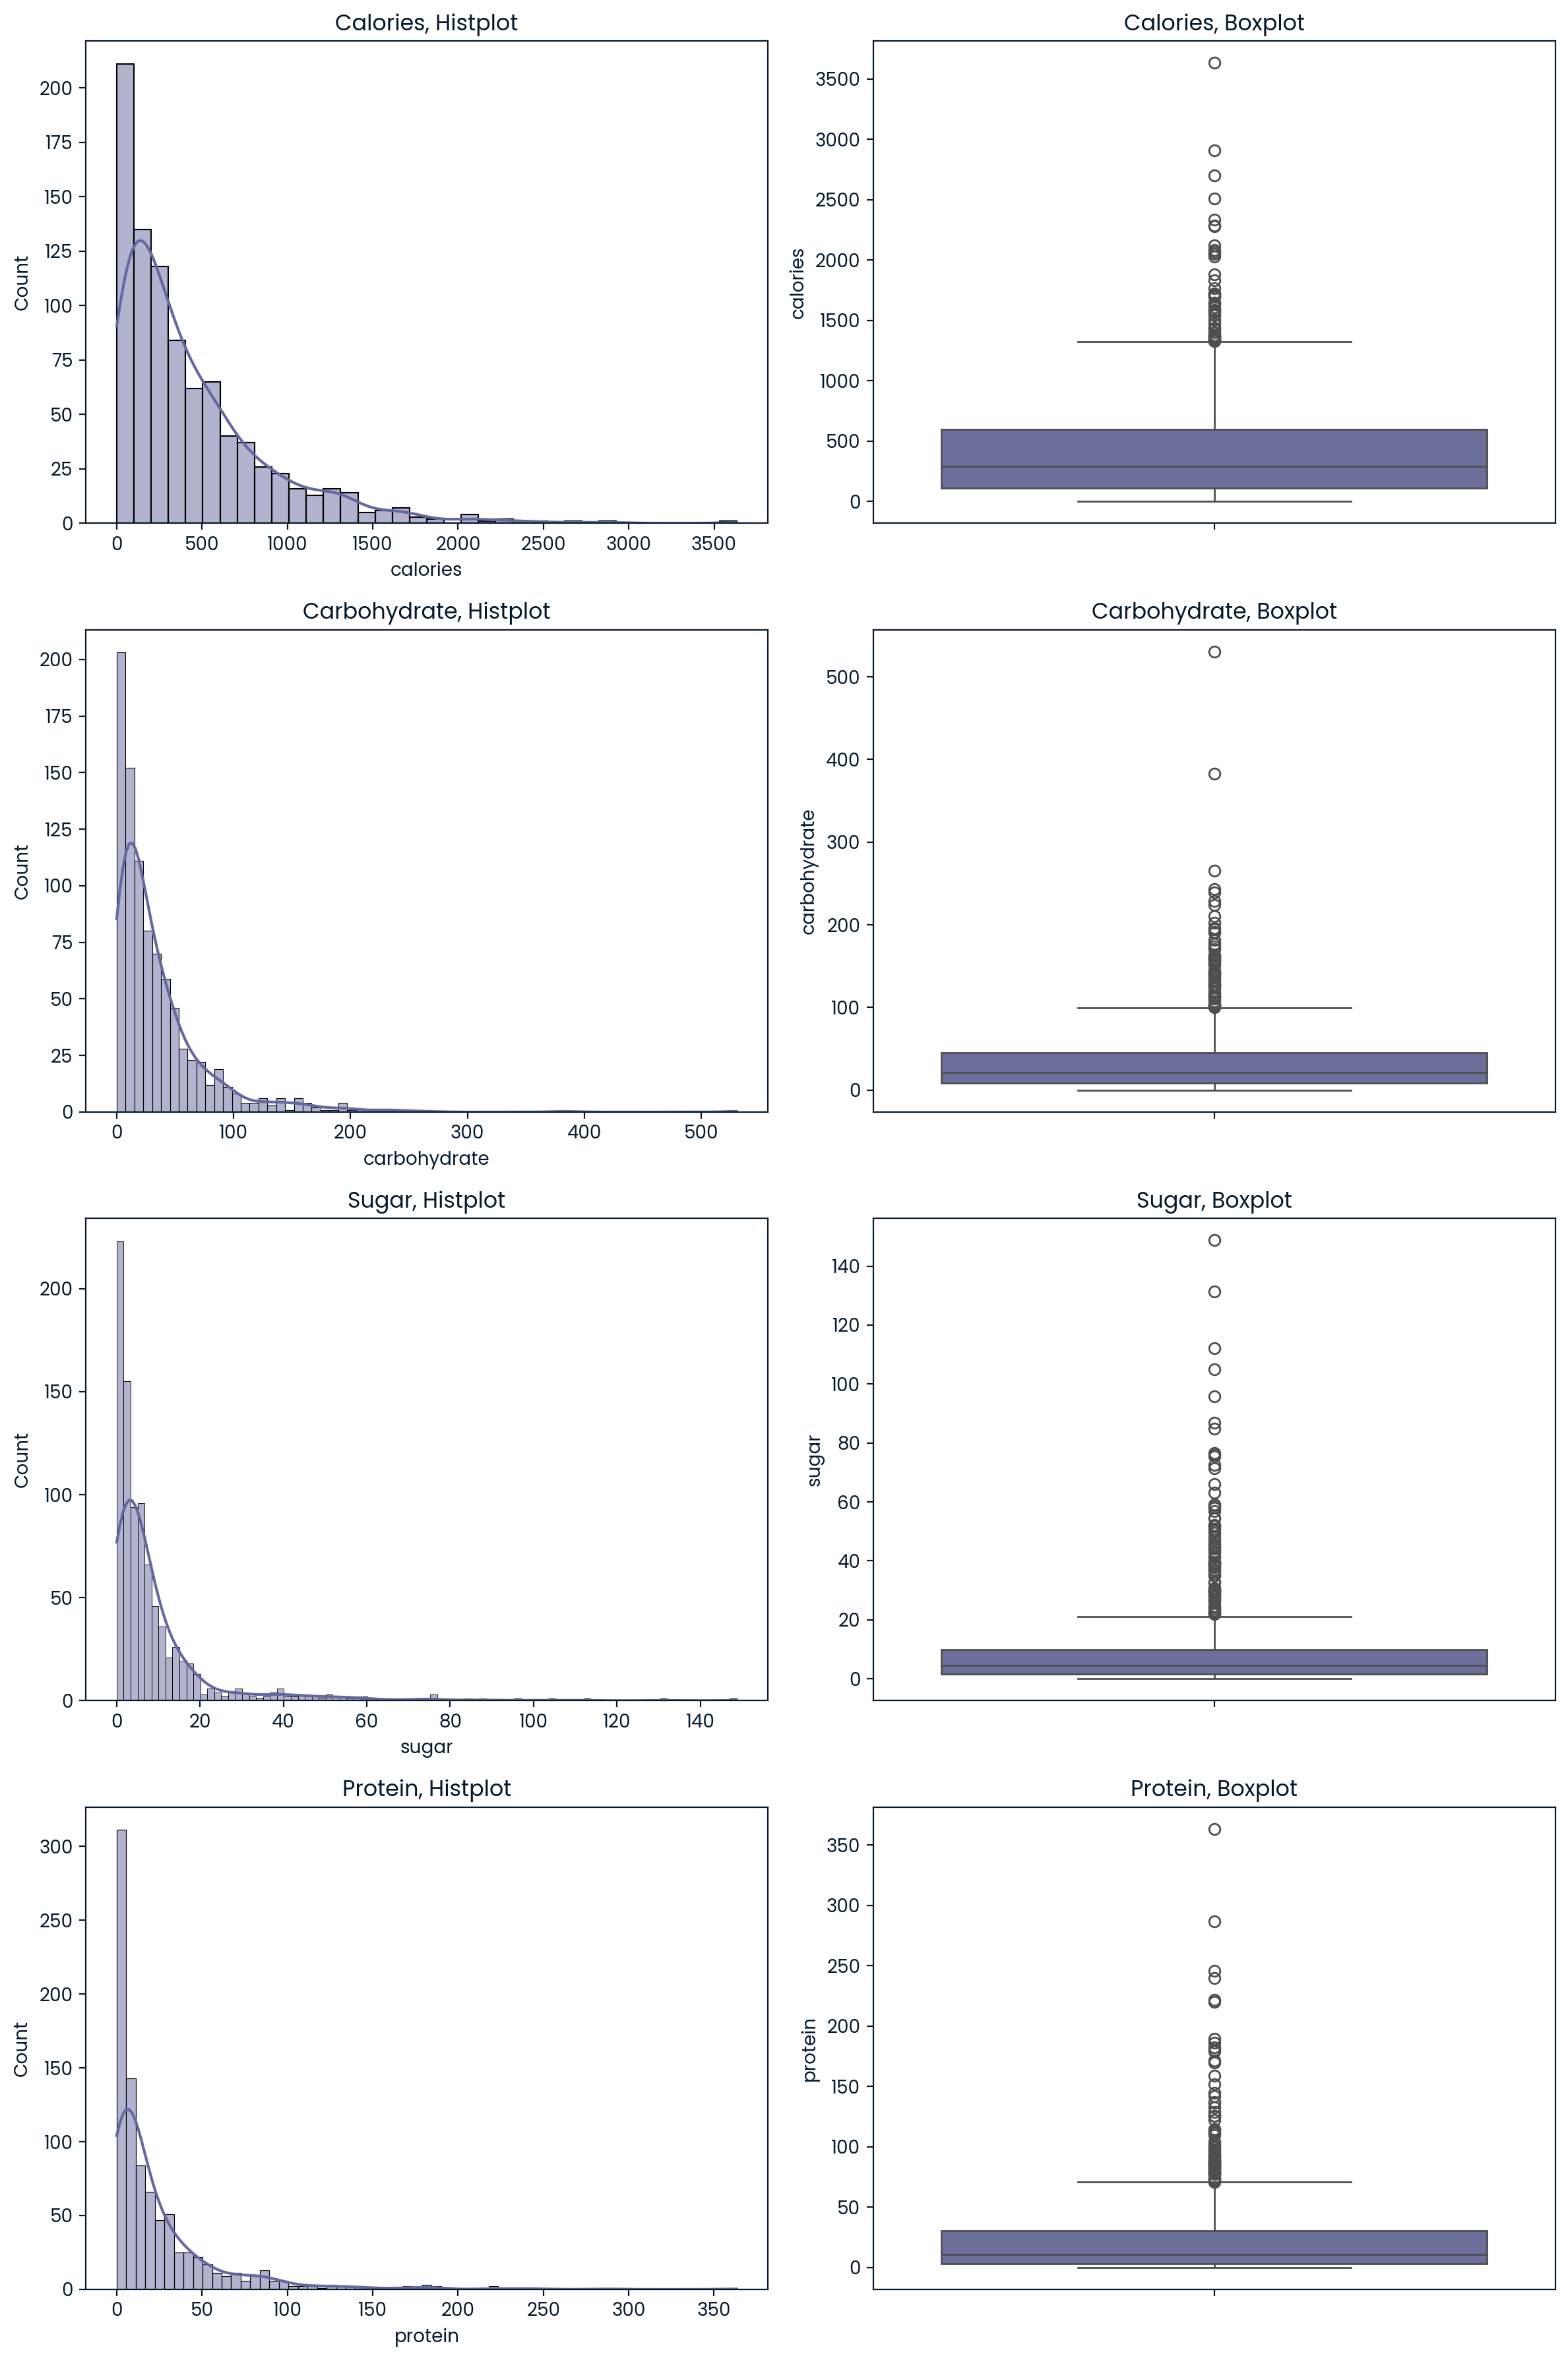

In [23]:
plt.figure(figsize=(12, 18))

ax1 = plt.subplot(4, 2, 1)
sns.histplot(data=cleaned_df, x='calories', kde=True, ax=ax1)
plt.title('Calories, Histplot')

ax2 = plt.subplot(4, 2, 2)
sns.boxplot(data=cleaned_df, y='calories', ax=ax2)
plt.title('Calories, Boxplot')

ax3 = plt.subplot(4, 2, 3)
sns.histplot(data=cleaned_df, x='carbohydrate', kde=True, ax=ax3)
plt.title('Carbohydrate, Histplot')

ax4 = plt.subplot(4, 2, 4)
sns.boxplot(data=cleaned_df, y='carbohydrate', ax=ax4)
plt.title('Carbohydrate, Boxplot')

ax5 = plt.subplot(4, 2, 5)
sns.histplot(data=cleaned_df, x='sugar', kde=True, ax=ax5)
plt.title('Sugar, Histplot')

ax6 = plt.subplot(4, 2, 6)
sns.boxplot(data=cleaned_df, y='sugar', ax=ax6)
plt.title('Sugar, Boxplot')

ax7 = plt.subplot(4, 2, 7)
sns.histplot(data=cleaned_df, x='protein', kde=True, ax=ax7)
plt.title('Protein, Histplot')

ax8 = plt.subplot(4, 2, 8)
sns.boxplot(data=cleaned_df, y='protein', ax=ax8)
plt.title('Protein, Boxplot')

plt.tight_layout()
plt.show()

### Conclusion

- **Log Transformation**: Given the right-skewed nature of the distributions for Calories, Carbohydrate, Sugar, and Protein, a log transformation will be applied to these variables. This transformation can help normalize the data and potentially improve the performance of the predictive models.

- **Outlier Handling**: Although there are values outside the Interquartile Range (IQR) for the nutritional variables, these outliers appear to be reasonable and are accompanied by a range of acceptable values. Therefore, no outliers will be removed, as they do not seem to be the result of data entry errors but rather reflect genuine variability in the data.


## Relationship between Numerical Values and High Traffic

Below is a heatmap of the relationships between the nutritional values (Calories, Carbohydrate, Sugar, and Protein) and the target variable, `high_traffic`.

- **Heatmap Analysis**: The heatmap reveals that the strongest relationship is between Calories and Protein, showing a positive, albeit low, correlation. This indicates that as the calorie content increases, the protein content tends to increase slightly as well.

- **Correlation with `high_traffic`**: When examining the correlations between nutritional values and `high_traffic`, it is observed that the relationships are generally weak. This suggests that while there may be some association between nutritional values and high traffic, the correlations are not strong, indicating that these variables might have limited predictive power on their own for determining high traffic.

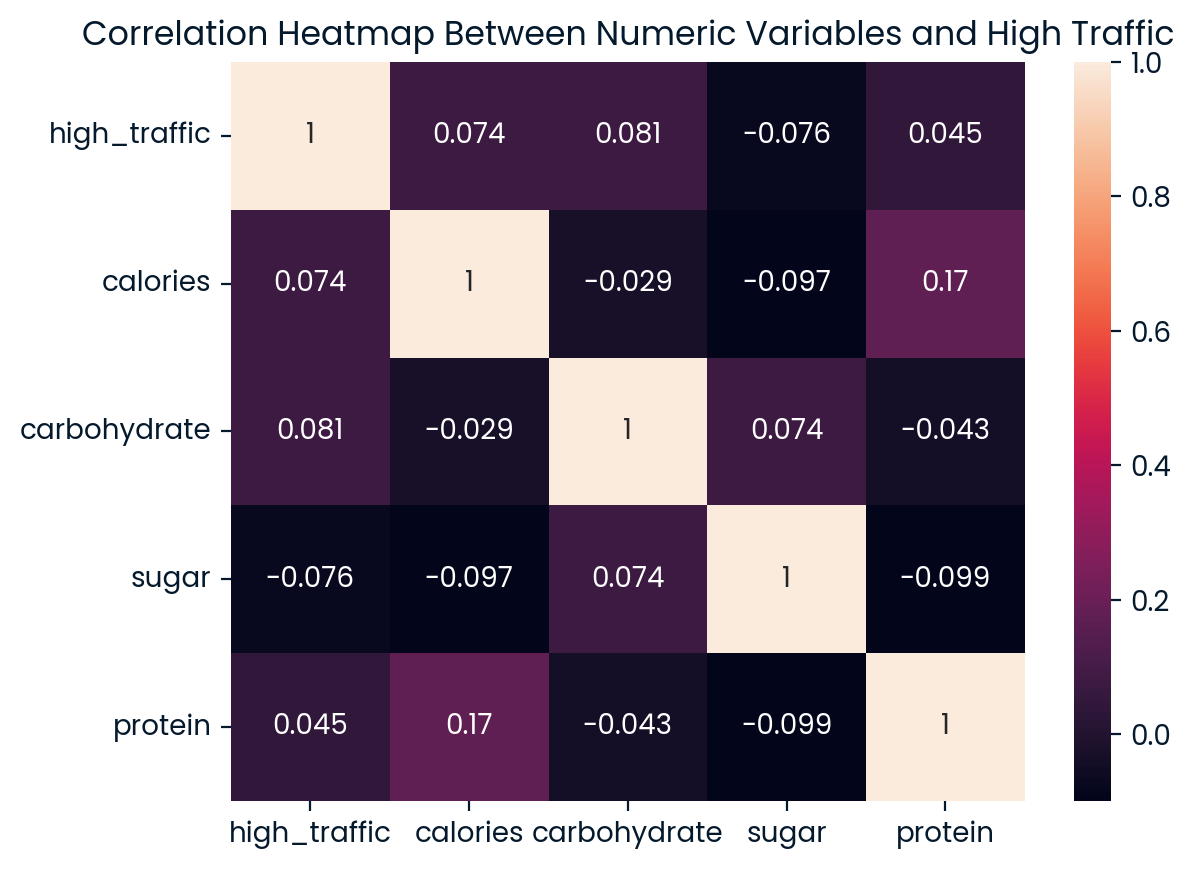

In [24]:
# numeric heatmap
heatmap_vals = ['high_traffic'] + nutrient_vals
numeric_vals = nutrient_vals
numeric = cleaned_df[heatmap_vals]
sns.heatmap(numeric.corr(),annot=True).set(title='Correlation Heatmap Between Numeric Variables and High Traffic')
plt.show()   

In [25]:
# compile correlation data into dataframe
correlation_data = []

# linear correlations with 'high_traffic'
for col in numeric_vals:
    correlation, p_value = pointbiserialr(cleaned_df['high_traffic'], cleaned_df[col])
    correlation_data.append({'Variable': col, 'Type': 'Original', 'Correlation': correlation, 'P-Value': p_value})
    print(f"{col} to high_traffic correlation: {correlation:.4f} (P-value: {p_value:.4f})")

# linear correlations with 'high_traffic', per category
for cat in cleaned_df['category'].unique():
    category_df = cleaned_df[cleaned_df['category'] == cat]
    for col in numeric_vals:
        correlation, p_value = pointbiserialr(category_df['high_traffic'], category_df[col])
        print(f"{cat},{col} to high_traffic correlation: {correlation:.4f} (P-value: {p_value:.4f})")

calories to high_traffic correlation: 0.0744 (P-value: 0.0261)
carbohydrate to high_traffic correlation: 0.0809 (P-value: 0.0154)
sugar to high_traffic correlation: -0.0755 (P-value: 0.0238)
protein to high_traffic correlation: 0.0446 (P-value: 0.1828)
Potato,calories to high_traffic correlation: -0.1760 (P-value: 0.1114)
Potato,carbohydrate to high_traffic correlation: 0.0353 (P-value: 0.7514)
Potato,sugar to high_traffic correlation: -0.0946 (P-value: 0.3951)
Potato,protein to high_traffic correlation: 0.1201 (P-value: 0.2796)
Breakfast,calories to high_traffic correlation: -0.0263 (P-value: 0.7888)
Breakfast,carbohydrate to high_traffic correlation: -0.0991 (P-value: 0.3121)
Breakfast,sugar to high_traffic correlation: 0.0169 (P-value: 0.8635)
Breakfast,protein to high_traffic correlation: -0.0495 (P-value: 0.6142)
Beverages,calories to high_traffic correlation: -0.0679 (P-value: 0.5203)
Beverages,carbohydrate to high_traffic correlation: 0.0177 (P-value: 0.8670)
Beverages,sugar to 

In [26]:
# apply log transformation
cleaned_df_log = cleaned_df.copy()
for col in numeric_vals:
    cleaned_df_log[col] = np.log(cleaned_df_log[col] + 1)

# log correlation with  'high_traffic'
for col in numeric_vals:
    correlation, p_value = pointbiserialr(cleaned_df_log['high_traffic'], cleaned_df_log[col])
    correlation_data.append({'Variable': col, 'Type': 'Log-Transformed', 'Correlation': correlation, 'P-Value': p_value})
    print(f"Log-transformed {col} to high_traffic correlation: {correlation:.4f} (P-value: {p_value:.4f})")
# log correlation with 'high_traffic', per category
for cat in cleaned_df_log['category'].unique():
    category_df = cleaned_df_log[cleaned_df_log['category'] == cat]
    for col in numeric_vals:
        correlation, p_value = pointbiserialr(category_df['high_traffic'], category_df[col])
        print(f"{cat}, Log-transformed {col} to high_traffic correlation: {correlation:.4f} (P-value: {p_value:.4f})")

Log-transformed calories to high_traffic correlation: 0.0620 (P-value: 0.0636)
Log-transformed carbohydrate to high_traffic correlation: 0.0602 (P-value: 0.0720)
Log-transformed sugar to high_traffic correlation: -0.0735 (P-value: 0.0278)
Log-transformed protein to high_traffic correlation: 0.1337 (P-value: 0.0001)
Potato, Log-transformed calories to high_traffic correlation: -0.1889 (P-value: 0.0873)
Potato, Log-transformed carbohydrate to high_traffic correlation: -0.0192 (P-value: 0.8630)
Potato, Log-transformed sugar to high_traffic correlation: -0.0558 (P-value: 0.6164)
Potato, Log-transformed protein to high_traffic correlation: 0.1382 (P-value: 0.2127)
Breakfast, Log-transformed calories to high_traffic correlation: -0.0300 (P-value: 0.7598)
Breakfast, Log-transformed carbohydrate to high_traffic correlation: -0.1388 (P-value: 0.1560)
Breakfast, Log-transformed sugar to high_traffic correlation: 0.0065 (P-value: 0.9472)
Breakfast, Log-transformed protein to high_traffic correlat

## Logarithmic Transformation of Numeric Variables

Since the distributions of the numeric variables were skewed, a logarithmic transformation was applied to explore if this transformation improves relationships with the target variable, `high_traffic`.

Below are two heatmaps illustrating the relationships between the log-transformed nutritional values and `high_traffic`:

- **Correlations (Left)**: This heatmap displays the correlation coefficients between log-transformed nutritional values and `high_traffic`, as well as the correlations among the nutritional values themselves. By comparing these correlations with the original values, we can assess if the log transformation has enhanced the relationships with the target variable.

- **P-Values (Right)**: This heatmap presents the p-values for the correlations between log-transformed nutritional values and `high_traffic`. Lower p-values indicate stronger statistical significance of the correlations. This analysis helps determine if the log transformation has improved the statistical significance of the relationships with `high_traffic`.


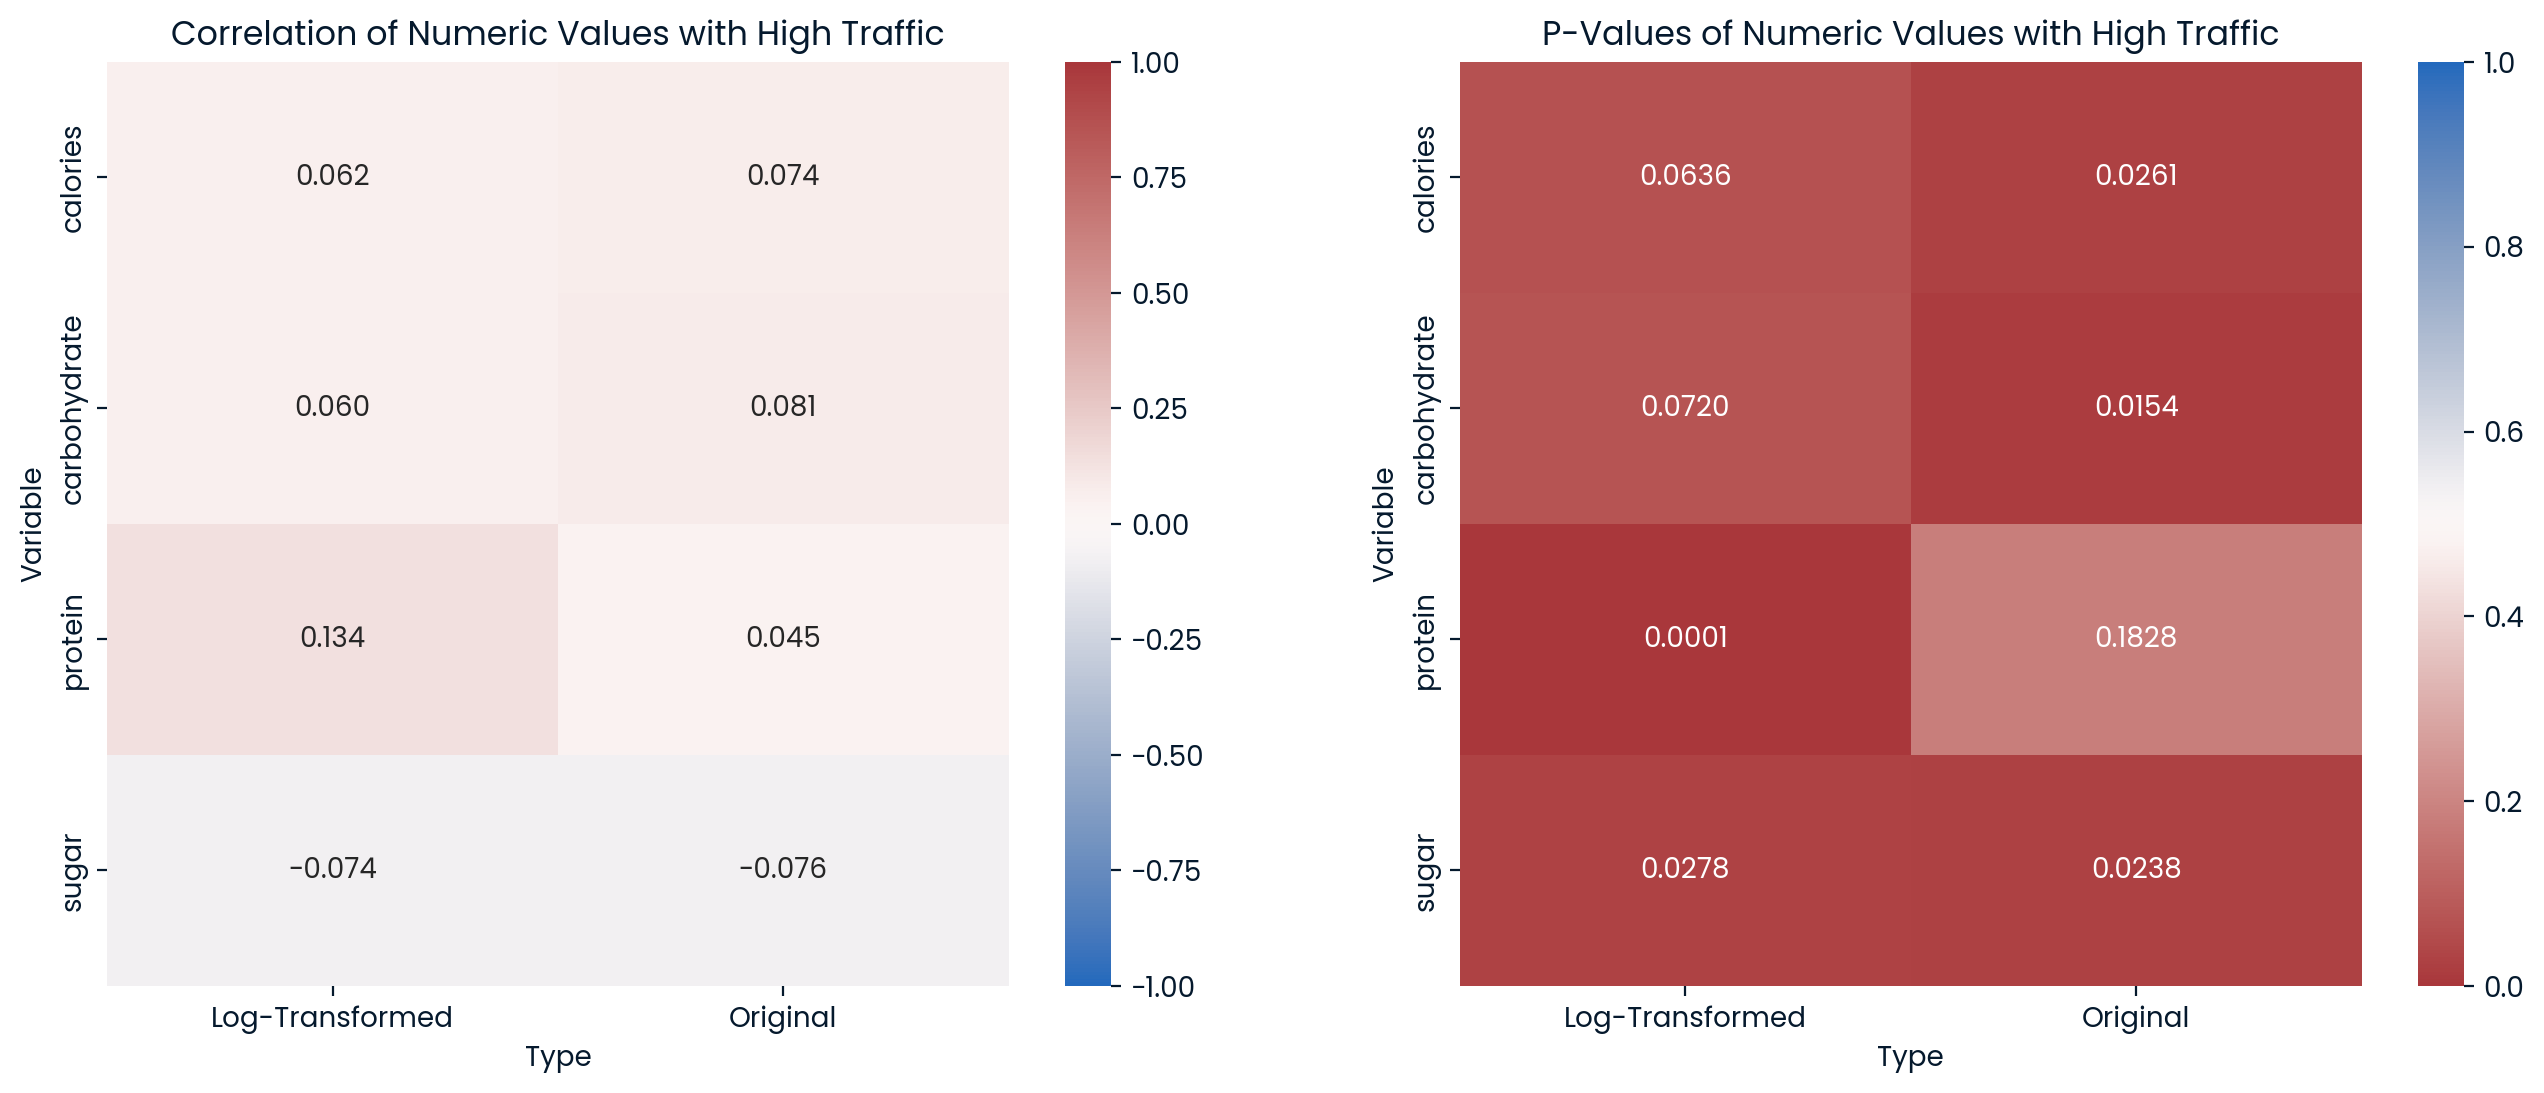

In [27]:
## heatmaps for correlation and p-values
# convert correlation data to dataframe
correlation_df = pd.DataFrame(correlation_data)

# plot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# correlation
correlation_pivot = correlation_df.pivot("Variable", "Type", "Correlation")
sns.heatmap(correlation_pivot, annot=True, fmt=".3f", cmap='vlag', center=0, vmin=-1, vmax=1, ax=ax[0])
ax[0].set_title('Correlation of Numeric Values with High Traffic')

# p-value
correlation_pivot = correlation_df.pivot("Variable", "Type", "P-Value")
sns.heatmap(correlation_pivot, annot=True, fmt=".4f", cmap='vlag_r', center=0.5, vmin=0, vmax=1, ax=ax[1])
ax[1].set_title('P-Values of Numeric Values with High Traffic')

plt.show()

### Conclusions

- The log-transformed `protein` variable showed an improvement in correlation with `high_traffic`, and it is now statistically significant in predicting the target variable. This indicates that the transformation has enhanced the predictive power of `protein`.

- For other nutritional values, while their log-transformed versions exhibited p-values less than 0.05, indicating statistical significance, the original values for `calories`, `carbohydrate`, and `sugar` are more significant in predicting `high_traffic` than their log-transformed counterparts. This suggests that, for these variables, the original values may better capture the relationship with `high_traffic` compared to their log-transformed versions.

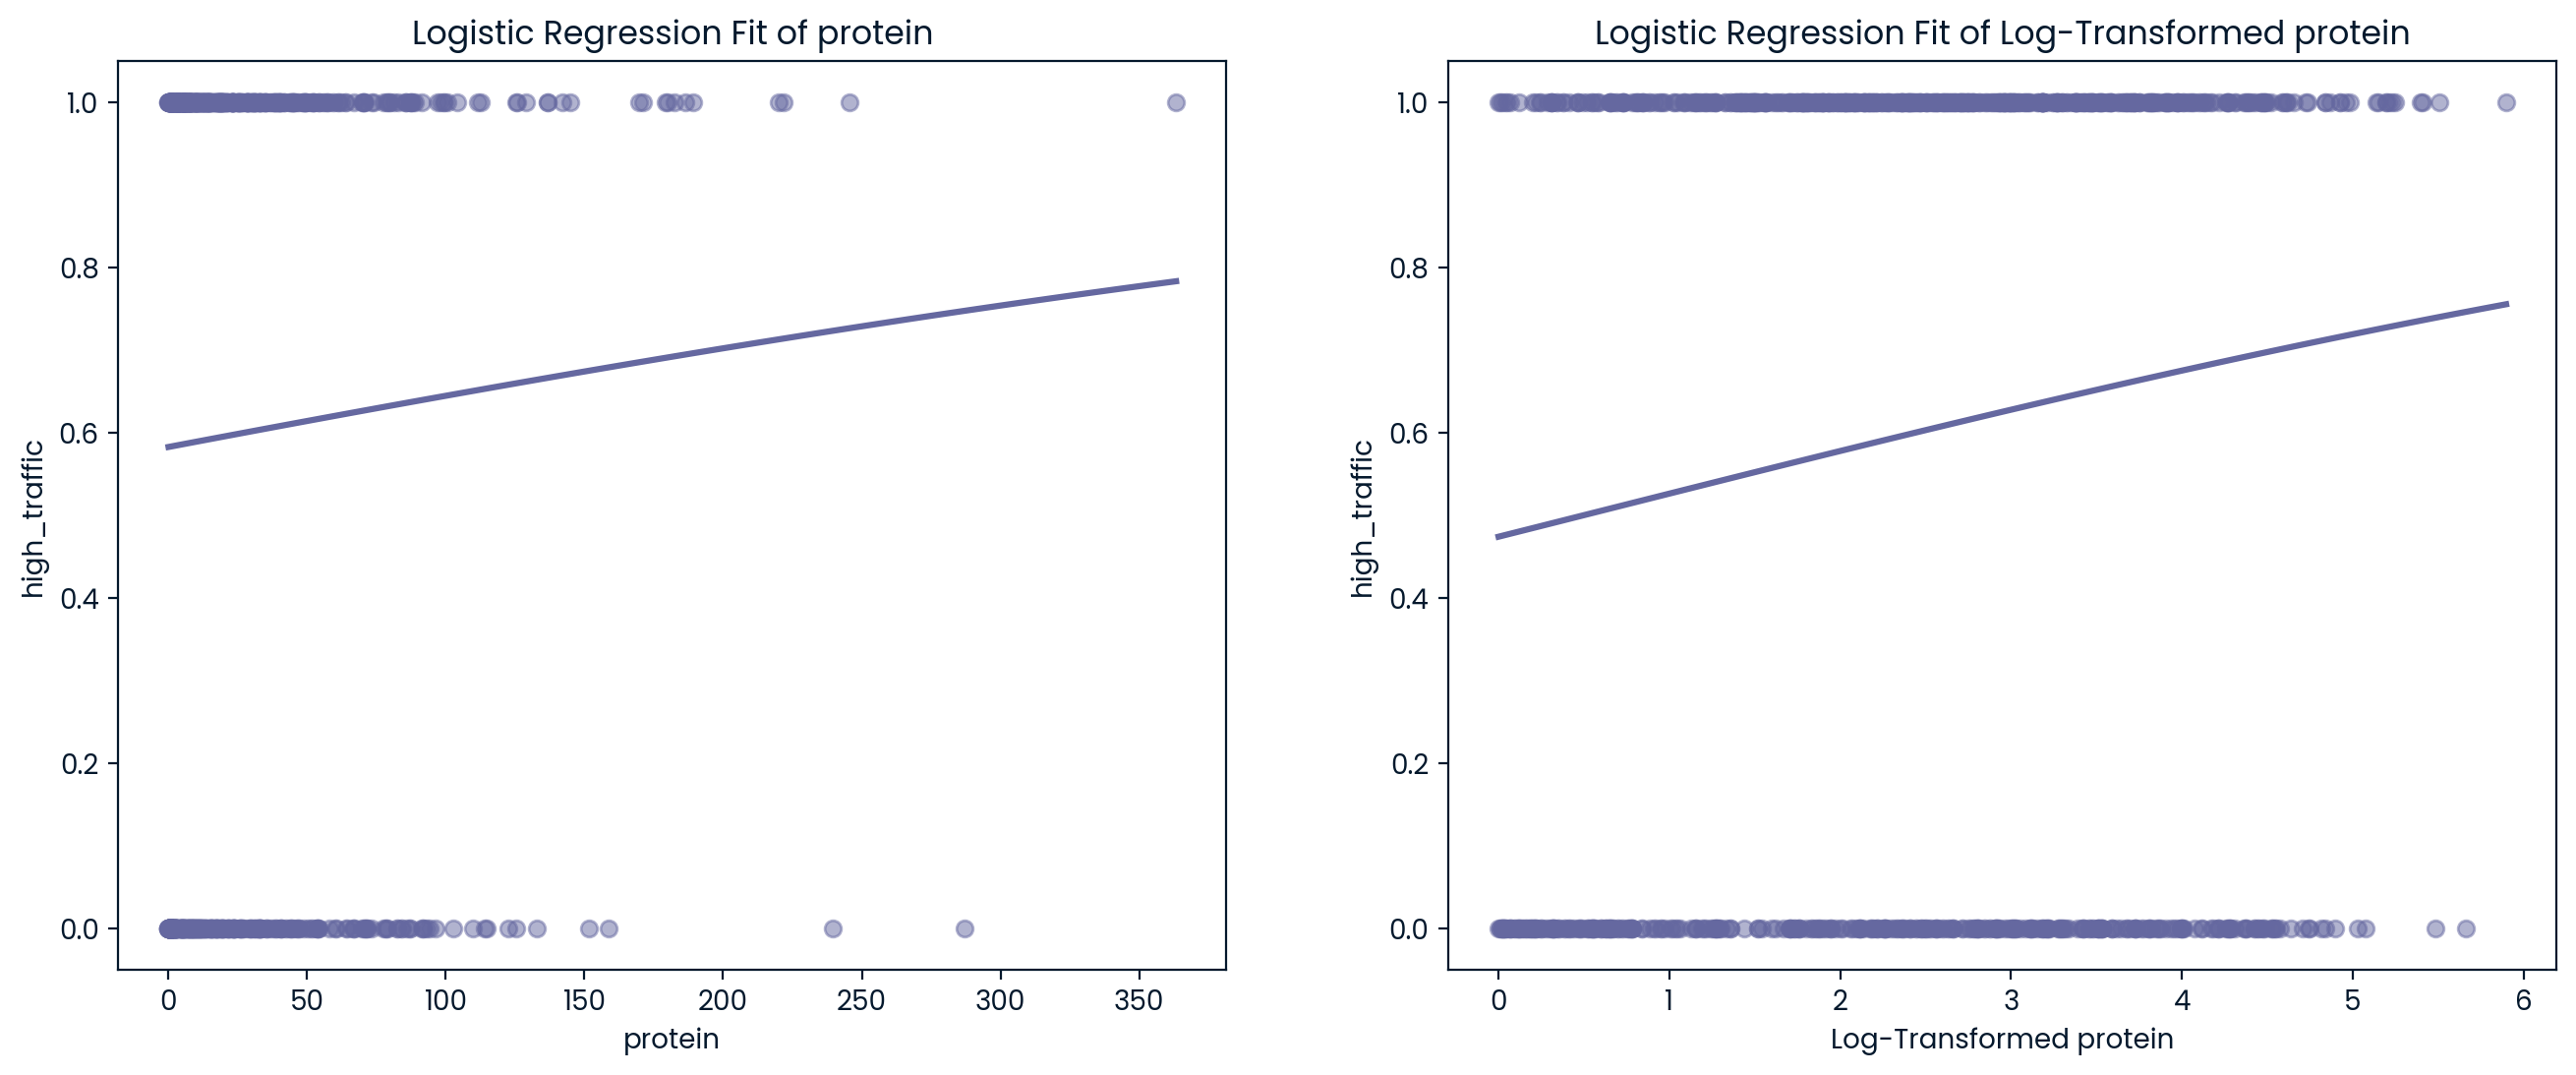

In [28]:
def plot_logistic_fit(data, x, y, axn, transformed=False, ):
    sns.regplot(x=x, y=y, data=data, logistic=True, ci=None, scatter_kws={'alpha':0.5}, ax=ax[axn])
    title = 'Logistic Regression Fit of ' + ('Log-Transformed ' if transformed else '') + x
    ax[axn].set_title(title)
    plt.xlabel('Log-Transformed ' + x if transformed else x)
    plt.ylabel(y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_logistic_fit(cleaned_df, 'protein', 'high_traffic', axn=0)
plot_logistic_fit(cleaned_df_log, 'protein', 'high_traffic', axn=1,transformed=True)
plt.show()

## Categorical Variable - Category, Servings

- **Category:** The distribution of the `category` variable is relatively uniform across most categories, with each representing between 7.5% and 10.3% of the dataset. Exceptions to this distribution include 'Breakfast,' which accounts for 11.8% of the data, and 'Chicken,' which is the most prevalent category at 18.2%.

- **Servings:** The `servings` variable shows that recipes with 4 or more servings constitute approximately 61.7% of the dataset. The remaining recipes have a serving size of 1 or 2, indicating a skew toward larger serving sizes in the dataset.

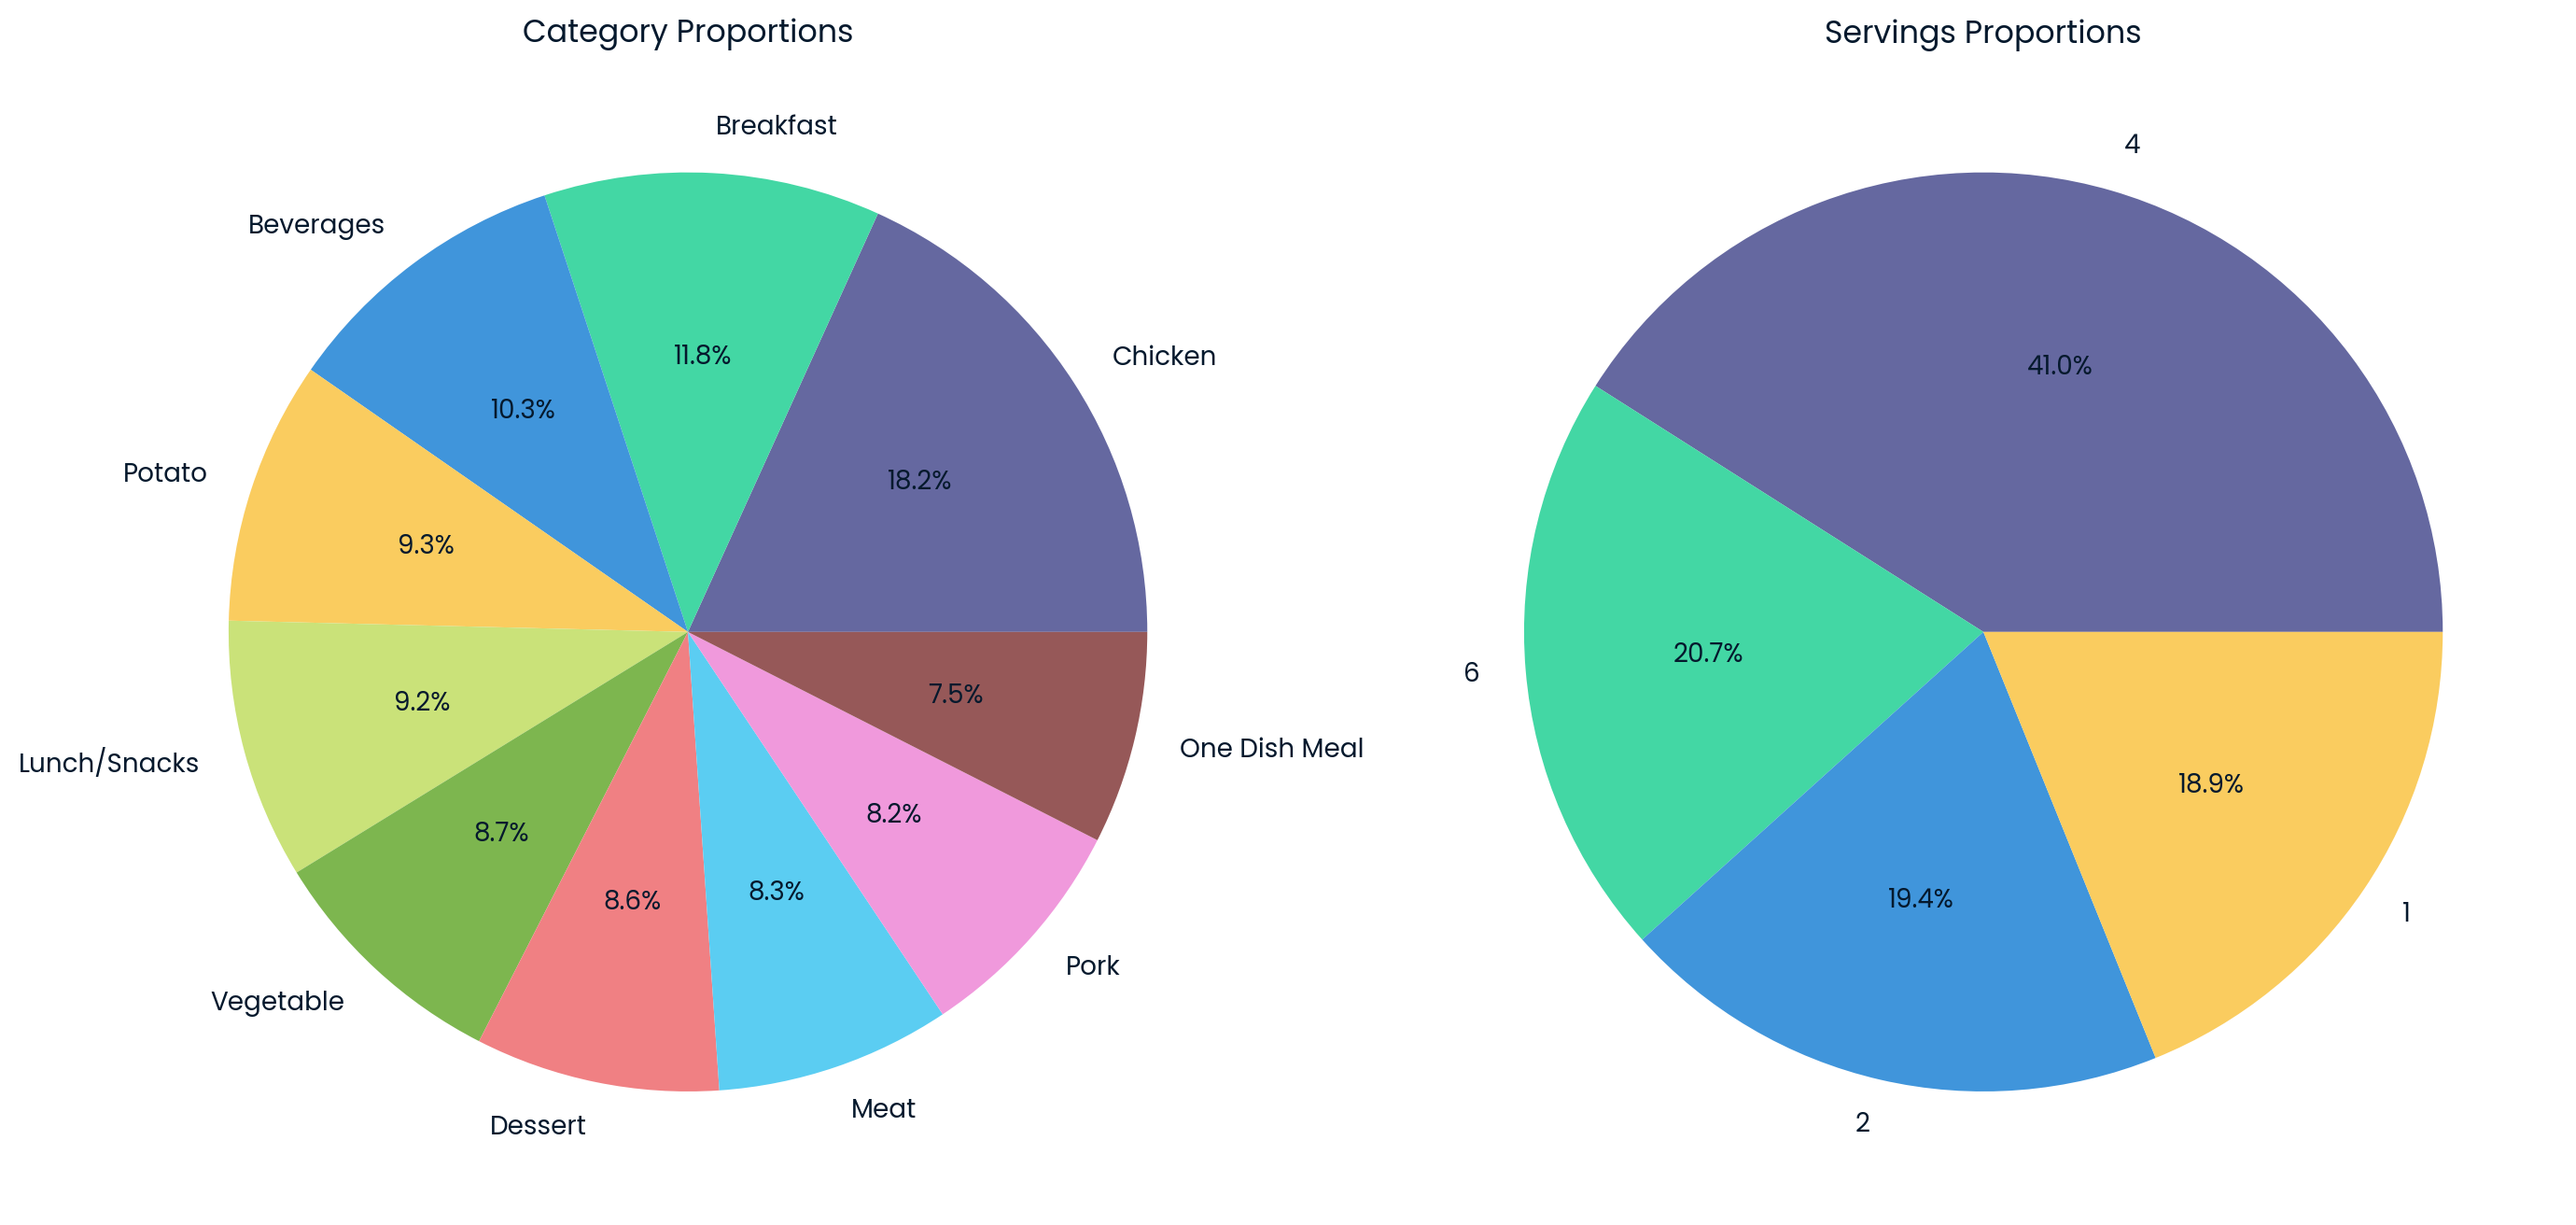

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# pie chart for 'category'
cleaned_df['category'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Category Proportions')
ax[0].set_ylabel('')


# pie chart for 'serving'
cleaned_df['servings'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
ax[1].set_title('Servings Proportions')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

## Relationship between Category and High Traffic

As discussed under the target variable section, certain categories more frequently produce a state of high traffic. This suggests that the `category` variable may be a useful predictor when combined with numeric variables in our modeling.

The following heatmaps provide insights into this relationship:

- **Correlation Heatmap:** This heatmap shows the correlation between each category and the `high_traffic` target variable.
- **P-Value Heatmap:** This heatmap presents the p-values indicating the statistical significance of the relationships between each category and `high_traffic`.

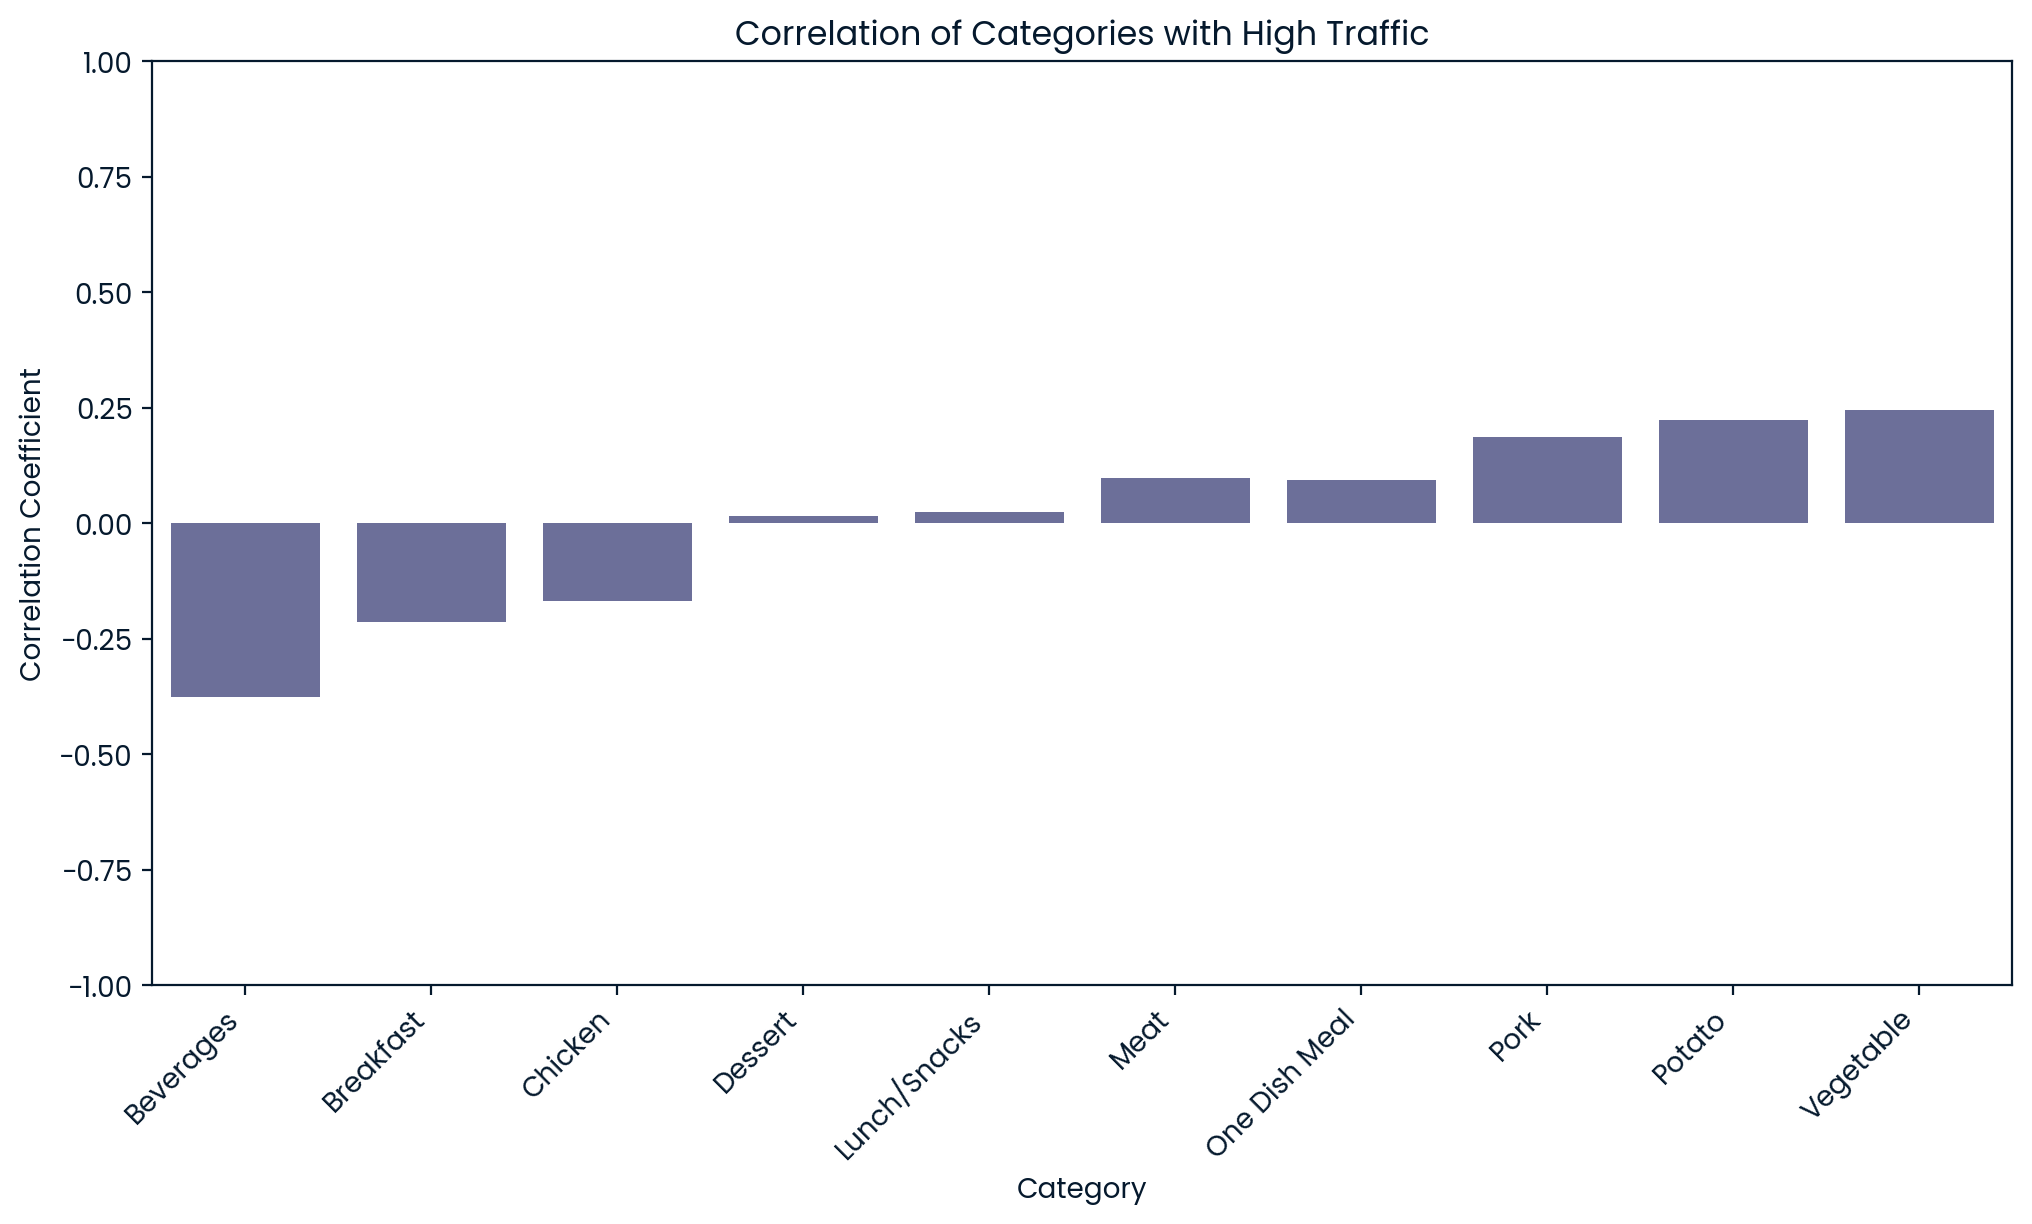

In [30]:
# dummy categories
category_dummies = pd.get_dummies(cleaned_df['category'])

categories = []
correlations = []
p_values = []

# calc corr and p-value
for column in category_dummies:
    corr, p_val = pointbiserialr(category_dummies[column], cleaned_df['high_traffic'])
    categories.append(column)
    correlations.append(corr)
    p_values.append(p_val)

# store results in idf
results_df_cleaned = pd.DataFrame({
    'Category': categories,
    'Correlation': correlations,
    'P-Value': p_values
})

# correlation bar chart with p-values
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(x='Category', y='Correlation', data=results_df_cleaned, ax=ax)
ax.set_title('Correlation of Categories with High Traffic')
ax.set_ylabel('Correlation Coefficient')
ax.set_ylim([-1, 1])
ax.set_xticklabels(results_df_cleaned['Category'], rotation=45, ha="right")

"""
# p-value anotations
for bar, p_value in zip(bars.patches, results_df_cleaned['P-Value']):
    y = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, y, f'p={p_value:.9f}', ha='center', va='bottom' if y >= 0 else 'top', color='black', fontsize=9)
"""
plt.show()

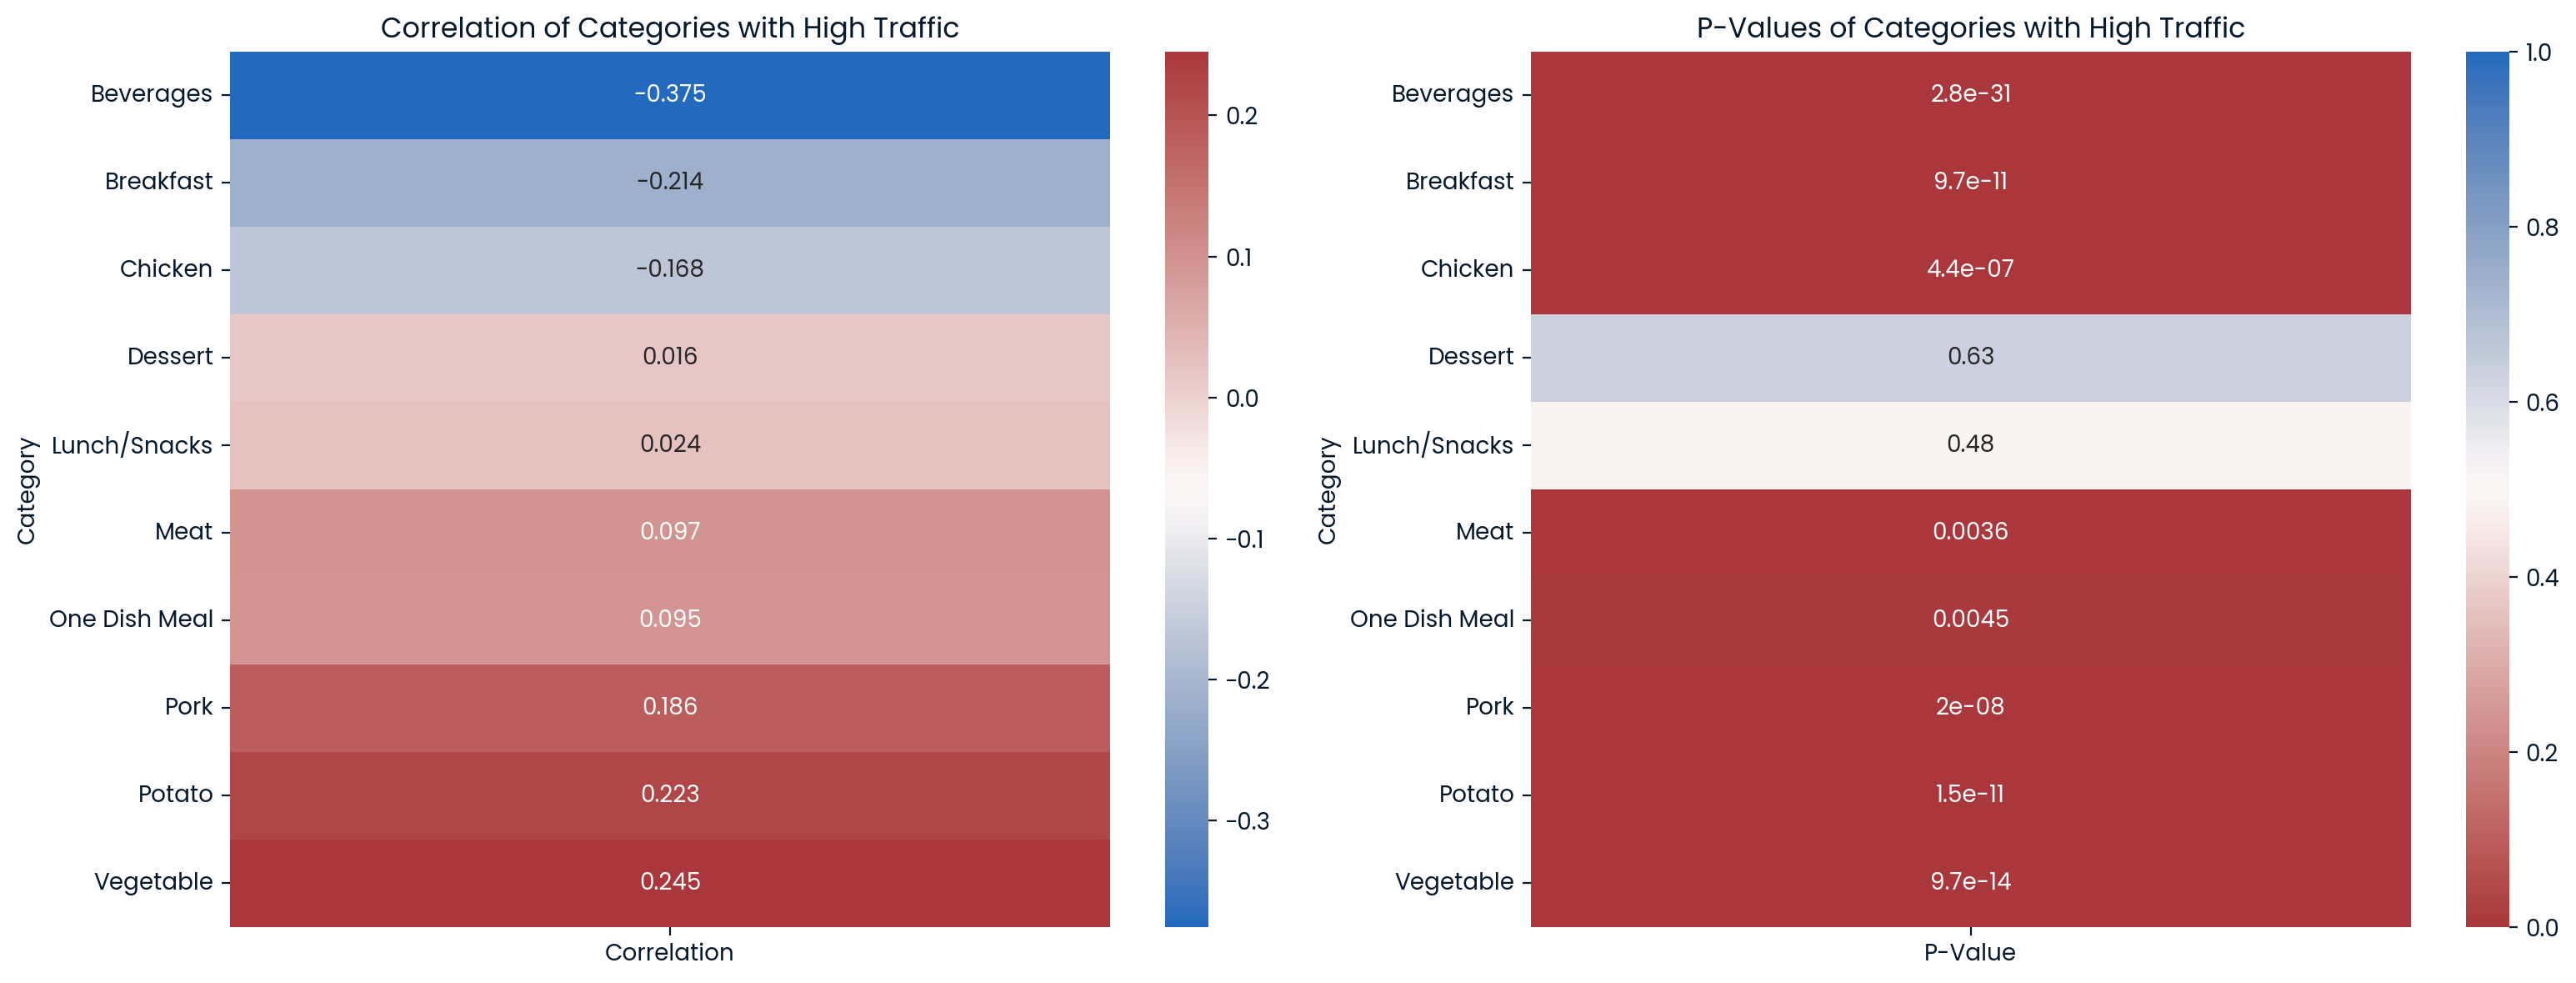

In [31]:
# dummy categories
category_dummies = pd.get_dummies(cleaned_df['category'])
cat_corr_df = pd.concat([cleaned_df, category_dummies], axis=1)
categories = []
correlations = []
p_values = []

# calculate correlation and p-values for each category
for column in category_dummies.columns:
    correlation, p_value = pointbiserialr(cat_corr_df[column], cat_corr_df['high_traffic'])
    categories.append(column)
    correlations.append(correlation)
    p_values.append(p_value)

# create dataframe
correlation_df = pd.DataFrame({
    'Category': categories,
    'Correlation': correlations,
    'P-Value': p_values
})

# plot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# corr
correlation_matrix = correlation_df.pivot_table(index='Category', values='Correlation', aggfunc='sum')
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='vlag', ax=ax[0])
ax[0].set_title('Correlation of Categories with High Traffic')

# p-value
p_values_matrix = correlation_df.pivot_table(index='Category', values='P-Value', aggfunc='sum')
sns.heatmap(p_values_matrix, annot=True, cmap='vlag_r', center=0.5, vmin=0, vmax=1, ax=ax[1])
ax[1].set_title('P-Values of Categories with High Traffic')

plt.tight_layout()
plt.show()

## Conclusion

- The analysis reveals several minor correlations between category values and `high_traffic`. 
- All category values, except for 'Dessert' and 'Lunch/Snacks', demonstrate statistical significance in predicting the `high_traffic` target variable.

## Relationship between Servings and High Traffic

As discussed under the target variable section, there does not appear to be a strong relationship between `servings` and `high_traffic`. The following heatmaps illustrate the correlation and p-values between these two variables.

In [32]:
correlation, p_value = pointbiserialr(cleaned_df['high_traffic'], cleaned_df['servings'])
print(f"Correlation: {correlation:.4f} \nP-value: {p_value:.4f}")

Correlation: 0.0432 
P-value: 0.1963


## Conclusion 
- There is only a minor positive correlation between servings and `high_traffic`, but this is not enough to be considered statistically significant.

# 3. Model Development

The goal of predicting `high_traffic` is a binary classification problem. For model development, I have selected the following models:

- **Logistic Regression:** This linear model is well-suited for binary classification problems. It was chosen because the features in the dataset include statistically significant predictors, which align well with the logistic regression approach. Logistic regression provides a clear interpretation of feature importance and the relationships between predictors and the target variable.

- **Random Forest Classifier:** This ensemble method uses multiple decision trees to model complex interactions between variables. It was selected for its robustness to various input data distributions and its ability to handle non-linear relationships. The Random Forest Classifier is useful for exploring interactions and patterns that might be missed by simpler linear models.

The following sections will include the code to fit these models, compare their performance, and evaluate their effectiveness based on appropriate metrics.

## Preprocessing

To prepare the data for modeling, the following preprocessing steps will be applied:

- **Target Variable:** `high_traffic` has already been binary encoded during the data validation process.

- **Numeric Features Normalization:** Numeric features (`calories`, `carbohydrate`, `sugar`, `protein`) will be normalized using `MinMaxScaler`. This scaler was chosen over `StandardScaler` because it resulted in higher precision and accuracy in preliminary tests.

- **Log Transformation:** The `protein` feature will be log-transformed to address skewness and then normalized using `MinMaxScaler`.

- **Categorical Feature Encoding:** The `category` feature will be one-hot encoded to convert categorical data into a format suitable for modeling.

The preprocessing steps will ensure that the features are appropriately scaled and formatted for input into the machine learning models.

In [33]:
# random state
RAND_STATE = 63

# scoring method
SCORING_METHOD = 'precision'

def log_transform(x):
    """Function to apply log transformation"""
    return np.log1p(x)

# identify numeric columns
numeric_features = cleaned_df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_features.remove('high_traffic')

# create log transformer
log_transformer = FunctionTransformer(log_transform)

# create ColumnTransformer, scales numeric columns and one-hot-encodes category
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('num_log', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  
            ('log', log_transformer),
            ('scaler', MinMaxScaler())
        ]), ['protein']), # log transforms protein
        ('cat', OneHotEncoder(), ['category'])
    ],
    remainder='passthrough'
)

# fit and transform
df_preprocessed = preprocessor.fit_transform(cleaned_df)

# convert back to df
columns_transformed = preprocessor.named_transformers_['cat'].get_feature_names_out(['category'])
new_columns = numeric_features + ['protein_log'] + list(columns_transformed) + ['high_traffic']
df_preprocessed = pd.DataFrame(df_preprocessed, columns=new_columns)
df_preprocessed.head()

,recipe,calories,carbohydrate,sugar,protein,servings,protein_log,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,high_traffic
0,0.000000,0.009727,0.072645,0.004370,0.002532,0.6,0.110598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.001058,0.251620,0.080413,0.020707,0.007926,0.0,0.229875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002116,0.026669,0.057561,0.259648,0.000055,0.6,0.003357,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.003175,0.007407,0.003431,0.005311,0.001459,0.6,0.072102,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004233,0.190203,0.006467,0.011026,0.148420,0.2,0.679207,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [34]:
# split into target sets
X = df_preprocessed.drop(['recipe','high_traffic', 'protein'], axis=1)
y = df_preprocessed['high_traffic']

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RAND_STATE)

# maintain proportion of classes
cv = StratifiedKFold(n_splits=10)

## Model 1: Logistic Regression

### Model Description

Logistic Regression is a linear model used for binary classification problems. It is chosen for its simplicity and interpretability, making it suitable given the presence of statistically significant predictors in our dataset.

### Model Training

The Logistic Regression model was trained on the preprocessed training data using the following parameters:
- **Random State:** 63 (for reproducibility)
- **Scoring Method:** Precision

In [35]:
# define hyperparameter grid
grid = {
    'C': [0.05, 0.1, 0.5, 1],
    'penalty': ["l1", "l2", "elasticnet", None],
    'multi_class': ["auto", "ovr", "multinomial"],
    'solver': ['liblinear', 'lbfgs', 'newton-cg']
}

# grid cross validate and fit
logreg = LogisticRegression(random_state=RAND_STATE)
logreg_cv = GridSearchCV(logreg, grid, cv=cv, scoring=SCORING_METHOD, verbose=1)
logreg_cv.fit(X_train, y_train)

# display results
print(f'Best Score: {logreg_cv.best_score_}')
print(f'Best Hyperparameters: {logreg_cv.best_params_}')
print(f'Std deviation of CV scores for the best hyperparameters: {logreg_cv.cv_results_["std_test_score"][logreg_cv.best_index_]}')

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Score: 0.8015619610356453
Best Hyperparameters: {'C': 0.1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Std deviation of CV scores for the best hyperparameters: 0.03959207830248714


In [36]:
# unpack best_params to create model
logreg2 = LogisticRegression(**logreg_cv.best_params_, random_state=RAND_STATE)
logreg2.fit(X_train, y_train)

LogisticRegression(C=0.1, multi_class='multinomial', random_state=63)

### Feature Importance in Logistic Regression Model

To understand the impact of each feature on the model's predictions, I analyzed the coefficients of the Logistic Regression model. These coefficients represent the importance of each feature, with larger absolute values indicating greater influence.

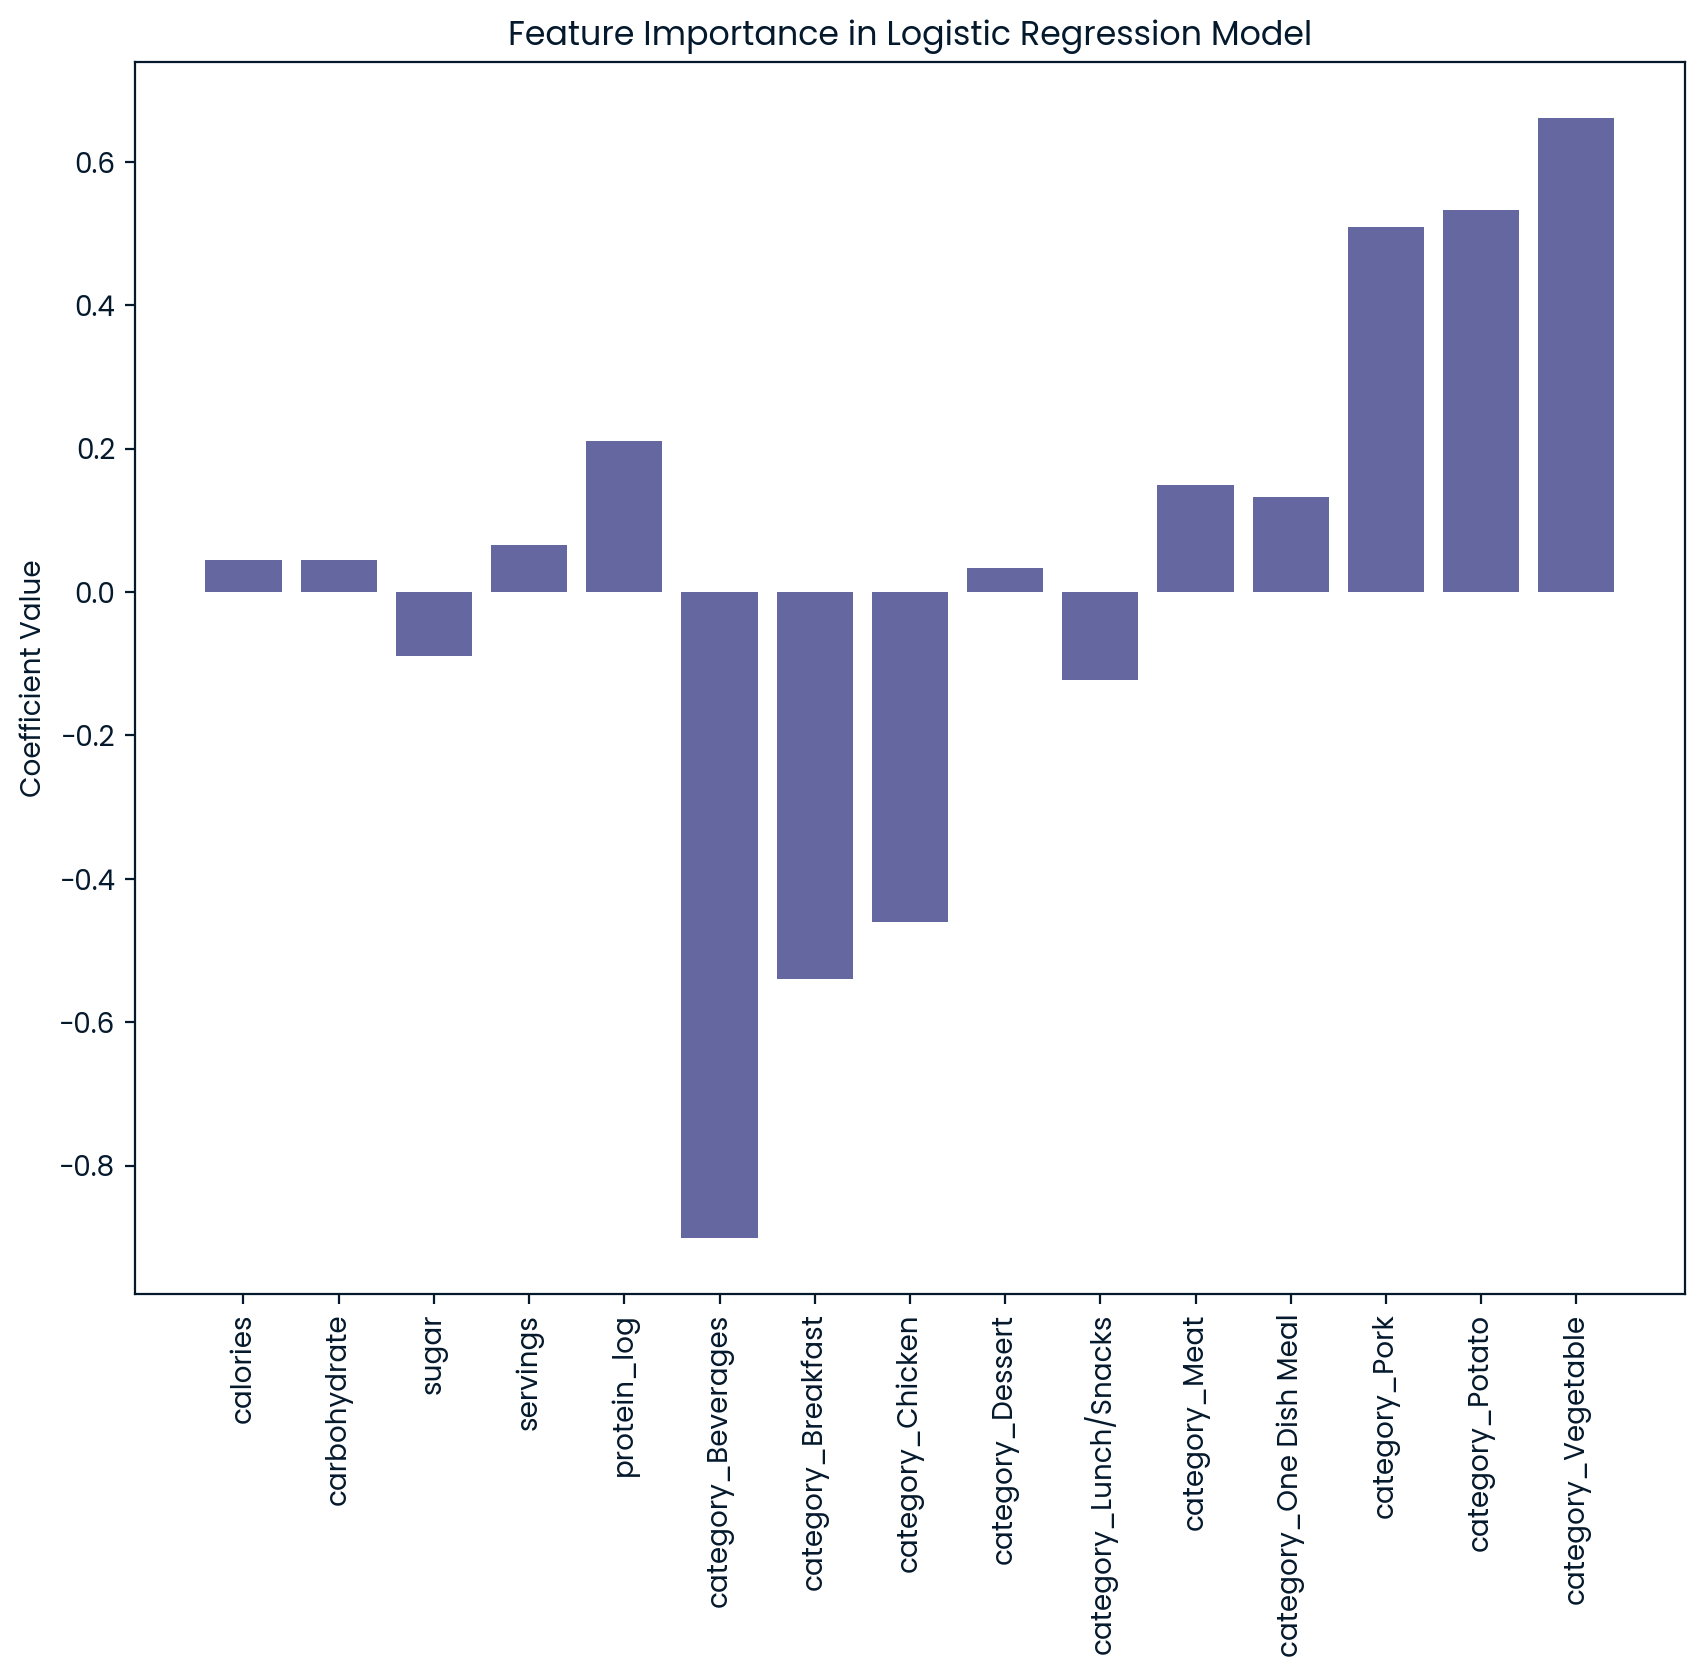

In [37]:
feature_cols = X.columns
resultdict = {}

model = logreg2

if len(model.coef_.shape) > 1:
    coefs = model.coef_[0]
else:
    coefs = model.coef_    

for i, col_name in enumerate(feature_cols):
    resultdict[col_name] = coefs[i]
    
plt.figure(figsize=(10, 8))
plt.bar(resultdict.keys(), resultdict.values())
plt.xticks(rotation=90)
plt.title('Feature Importance in Logistic Regression Model')
plt.ylabel('Coefficient Value')
plt.show()

### Model 2: Random Forest Classifier

A Random Forest Classifier was used as an alternative model to compare with the Logistic Regression model. Random Forests are robust ensemble methods that leverage multiple decision trees to improve prediction accuracy and handle complex interactions between features.

In [38]:
# define hyperparameter grid
grid = {
    'n_estimators': range(10, 100, 10),
    'max_depth': range(1, 10)
}

# grid cross validate and fit
rfc = RandomForestClassifier(random_state=RAND_STATE)
rfc_cv = GridSearchCV(rfc, grid, cv=cv, scoring=SCORING_METHOD, verbose=1)
rfc_cv.fit(X_train, y_train)

# display results
print(f'Best Score: {rfc_cv.best_score_}')
print(f'Best Hyperparameters: {rfc_cv.best_params_}')
print(f'Std deviation of CV scores for the best hyperparameters: {rfc_cv.cv_results_["std_test_score"][rfc_cv.best_index_]}')

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best Score: 0.7750656009793719
Best Hyperparameters: {'max_depth': 8, 'n_estimators': 20}
Std deviation of CV scores for the best hyperparameters: 0.05166332539478016


In [39]:
# unpack best_params to create model
rfc2 = RandomForestClassifier(**rfc_cv.best_params_, random_state=RAND_STATE)
rfc2.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=20, random_state=63)

### Feature Importance in Random Forest Model

The importance of each feature in the Random Forest model was evaluated to understand which features contribute most significantly to the predictions. 

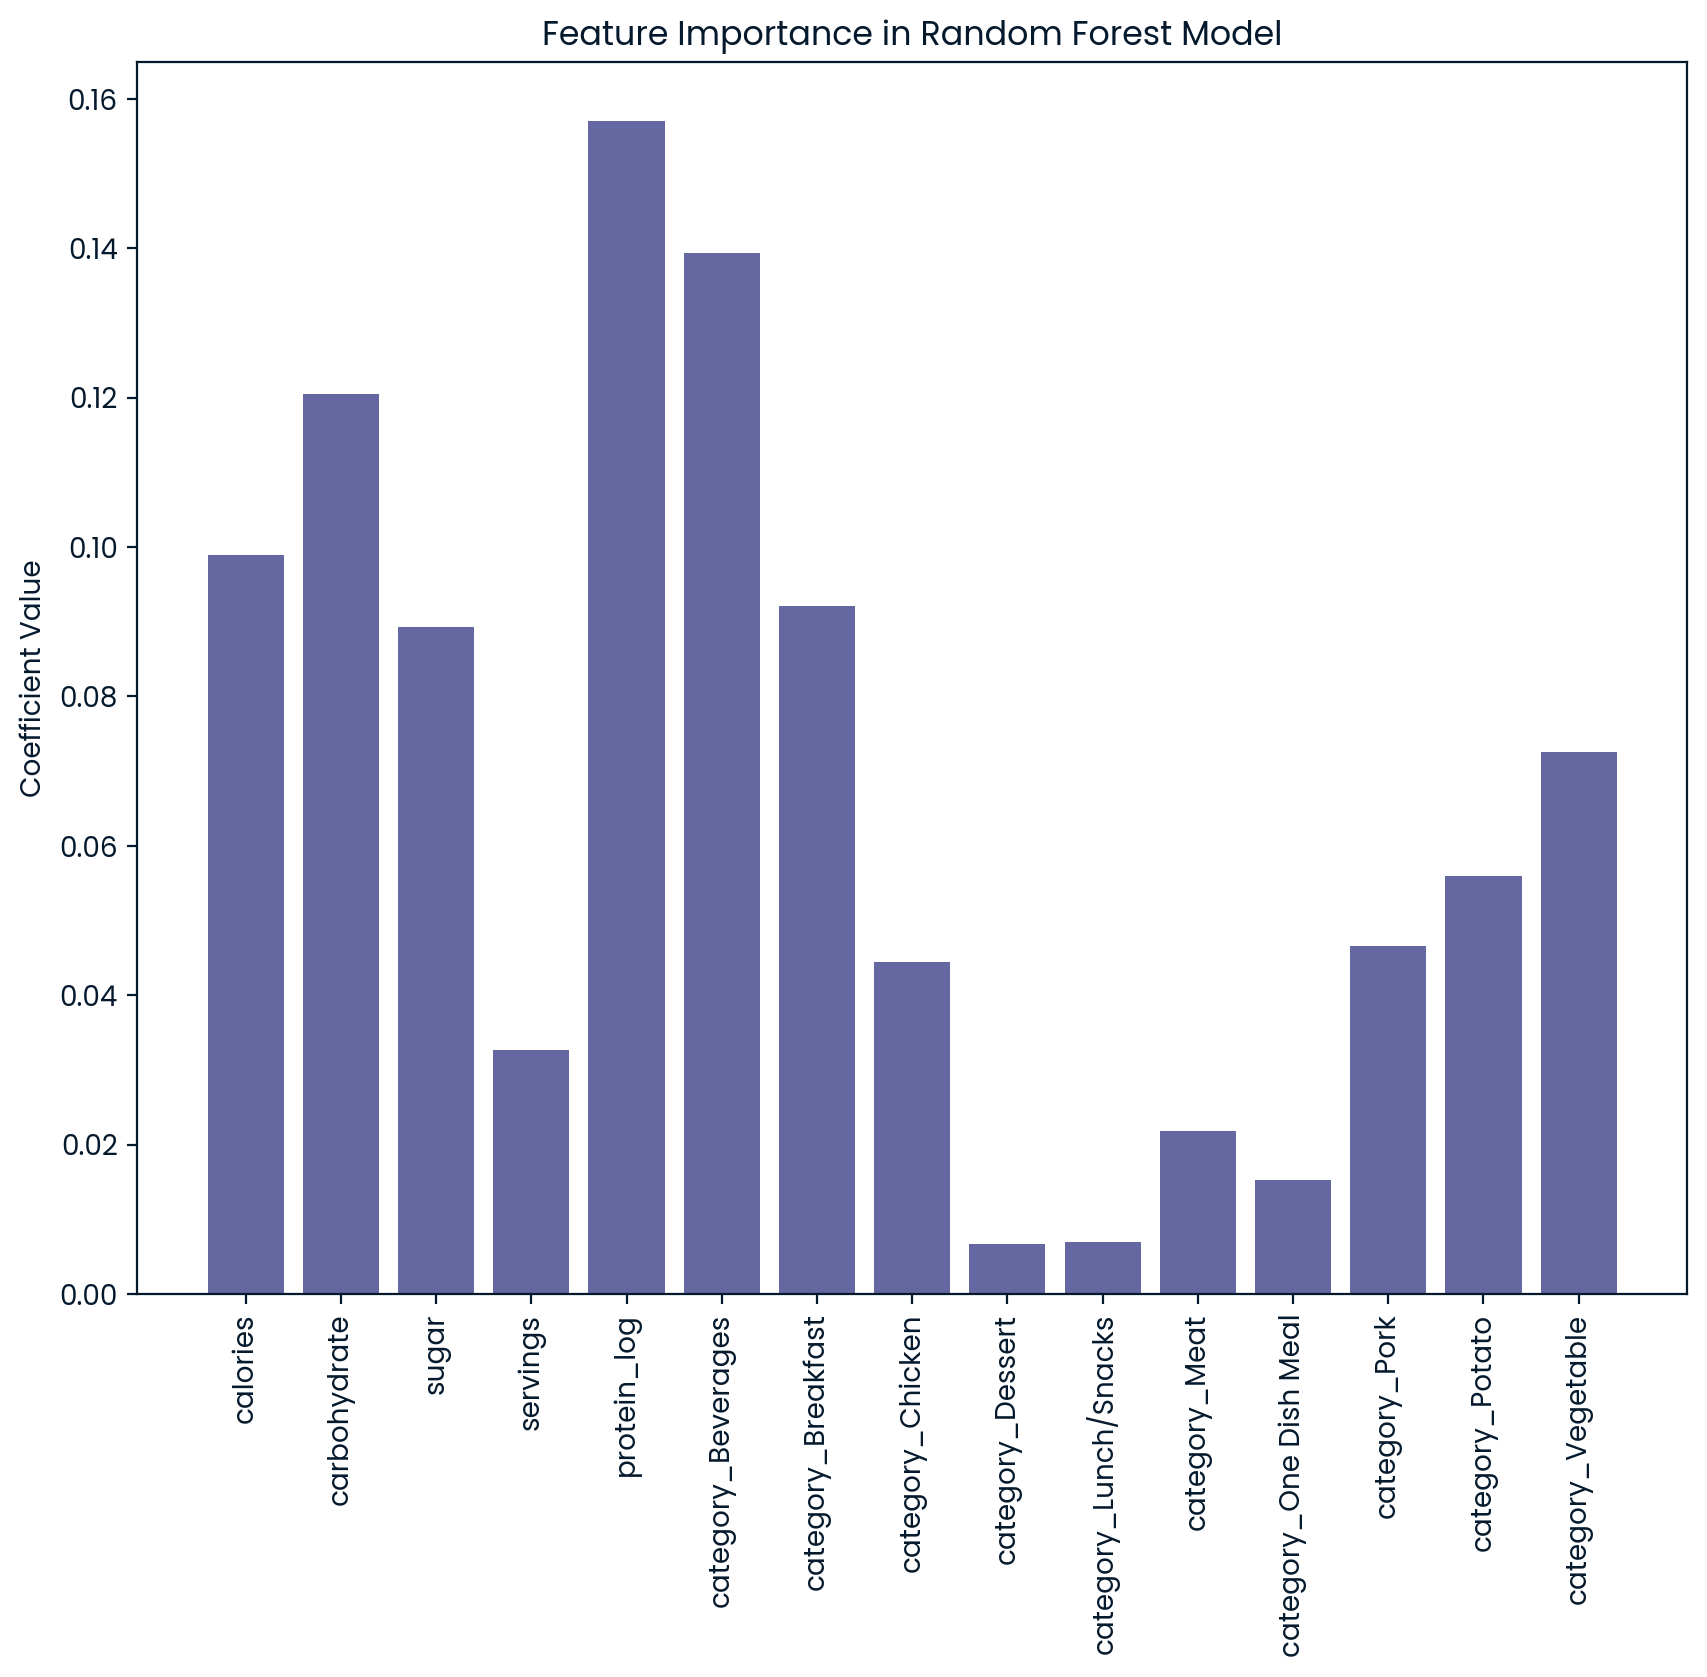

In [40]:
feature_cols = X.columns
resultdict = {}

model = rfc2

importances = model.feature_importances_

for i, col_name in enumerate(feature_cols):
    resultdict[col_name] = importances[i]
    
plt.figure(figsize=(10, 8))
plt.bar(resultdict.keys(), resultdict.values())
plt.xticks(rotation=90)
plt.title('Feature Importance in Random Forest Model')
plt.ylabel('Coefficient Value')
plt.show()

# 4. Model Evaluation

### Evaluation Metrics

For the evaluation of our models, the following metrics are used:

- **Precision**: This is the primary benchmark for our key performance indicator (KPI). Precision is prioritized because our business objective is to accurately predict instances of high traffic. Ensuring that predictions of high traffic are reliable (correct in 80% of cases) minimizes the cost of false positives.
- **Accuracy**: This serves as a secondary benchmark. Accuracy provides a measure of the overall effectiveness of the model across both classes of traffic. It is chosen for its simplicity and straightforward measure of the model's overall performance.

## Model 1: Logistic Regression

In [41]:
y_pred_logreg = logreg2.predict(X_test)

In [42]:
results = {
    'Logistic Regression': {
        'Precision': precision_score(y_test, y_pred_logreg),
        'Accuracy': accuracy_score(y_test, y_pred_logreg)
    }
}

print(f"Precision Score: {results['Logistic Regression']['Precision']:.2f}")
print(f"Accuracy Score: {results['Logistic Regression']['Accuracy']:.2f}\n")
print("Classification report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Precision Score: 0.81
Accuracy Score: 0.77

Classification report:
               precision    recall  f1-score   support

         0.0       0.72      0.71      0.72        91
         1.0       0.81      0.81      0.81       133

    accuracy                           0.77       224
   macro avg       0.76      0.76      0.76       224
weighted avg       0.77      0.77      0.77       224

Confusion matrix:
 [[ 65  26]
 [ 25 108]]


- **Precision**: 0.81, indicating that 81% of the predicted high traffic instances were correctly identified.
- **Accuracy**: 0.77, meaning that 77% of the total predictions were correct.

The classification report shows the breakdown of precision, recall, and F1-score for each class, with the model performing well in predicting high traffic (class `1.0`). The confusion matrix further details the number of true positives, false positives, true negatives, and false negatives.

## Model 2: Random Forest Classifier

In [43]:
y_pred_rfc = rfc2.predict(X_test)

In [44]:
results['Random Forest'] = {
    'Precision': precision_score(y_test, y_pred_rfc),
    'Accuracy': accuracy_score(y_test, y_pred_rfc)
}

print(f"Precision Score: {results['Random Forest']['Precision']:.2f}")
print(f"Accuracy Score: {results['Random Forest']['Accuracy']:.2f}\n")
print("Classification report:\n", classification_report(y_test, y_pred_rfc))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rfc))

Precision Score: 0.75
Accuracy Score: 0.75

Classification report:
               precision    recall  f1-score   support

         0.0       0.75      0.58      0.65        91
         1.0       0.75      0.86      0.80       133

    accuracy                           0.75       224
   macro avg       0.75      0.72      0.73       224
weighted avg       0.75      0.75      0.74       224

Confusion matrix:
 [[ 53  38]
 [ 18 115]]


- **Precision**: 0.75, meaning that 75% of the predicted high traffic instances were correctly identified.
- **Accuracy**: 0.75, indicating that 75% of the total predictions were accurate.

The classification report details precision, recall, and F1-score for each class. The Random Forest model shows a balanced performance with a slightly lower precision compared to the Logistic Regression model but a higher recall for the high traffic class. The confusion matrix shows the distribution of true positives, false positives, true negatives, and false negatives for the Random Forest Classifier.

### Results

The **Logistic Regression** model achieved a precision of 81% and an accuracy of 77%, outperforming the **Random Forest Classifier**, which had a precision of 75% and an accuracy of 75%. This indicates that the Logistic Regression model is more effective at predicting high traffic instances with fewer false positives compared to the Random Forest model. Overall, the Logistic Regression model meets the business criteria.

Interestingly, the Random Forest model, despite its slightly lower precision and accuracy, exhibits a higher recall for high traffic predictions (86% compared to 81% for Logistic Regression). This implies that the Random Forest model can identify more instances of high traffic but at the expense of more false positives (38 false positives compared to 26 from the Logistic Regression model). Given the business context, where minimizing false positives is crucial, precision is a more critical KPI than recall. The Random Forest’s tendency to overpredict high traffic could lead to inefficient use of featured recipes on the website.

Furthermore, the Logistic Regression model, being linear, aligns well with the binary classification problem and the linear relationships observed among the features. Its linear nature helps it generalize better to new data and reduces the risk of overfitting compared to the Random Forest model, which might overfit due to its complexity.

In summary, the Logistic Regression model provides a more balanced performance, meets the business criteria, results in fewer false positives, and is less prone to overfitting. Therefore, it is the preferred model for predicting high traffic.


# 5. Business Metrics

The current business practice of selecting recipes to feature on the website results in high traffic approximately 60% of the time.

The business has defined two goals:

1. **Predict which recipes will lead to high traffic.**
2. **Correctly predict high traffic recipes 80% of the time.**

The **Logistic Regression** model meets these requirements. Its precision score of 81% indicates that when the model predicts high traffic, it is correct at least 80% of the time. Additionally, the recall and F1 scores are both 81%, showing that the model accurately identifies 81% of all actual high traffic instances. This highlights the model’s effectiveness in predicting high traffic scenarios. The overall accuracy of 77% demonstrates a balanced approach in identifying both normal and high traffic recipes.

Going forward, the business should monitor:
- **Accuracy** as a KPI for the first goal of predicting which recipes will lead to high traffic.
- **Precision** as a KPI for the second goal of correctly predicting high traffic recipes 80% of the time.


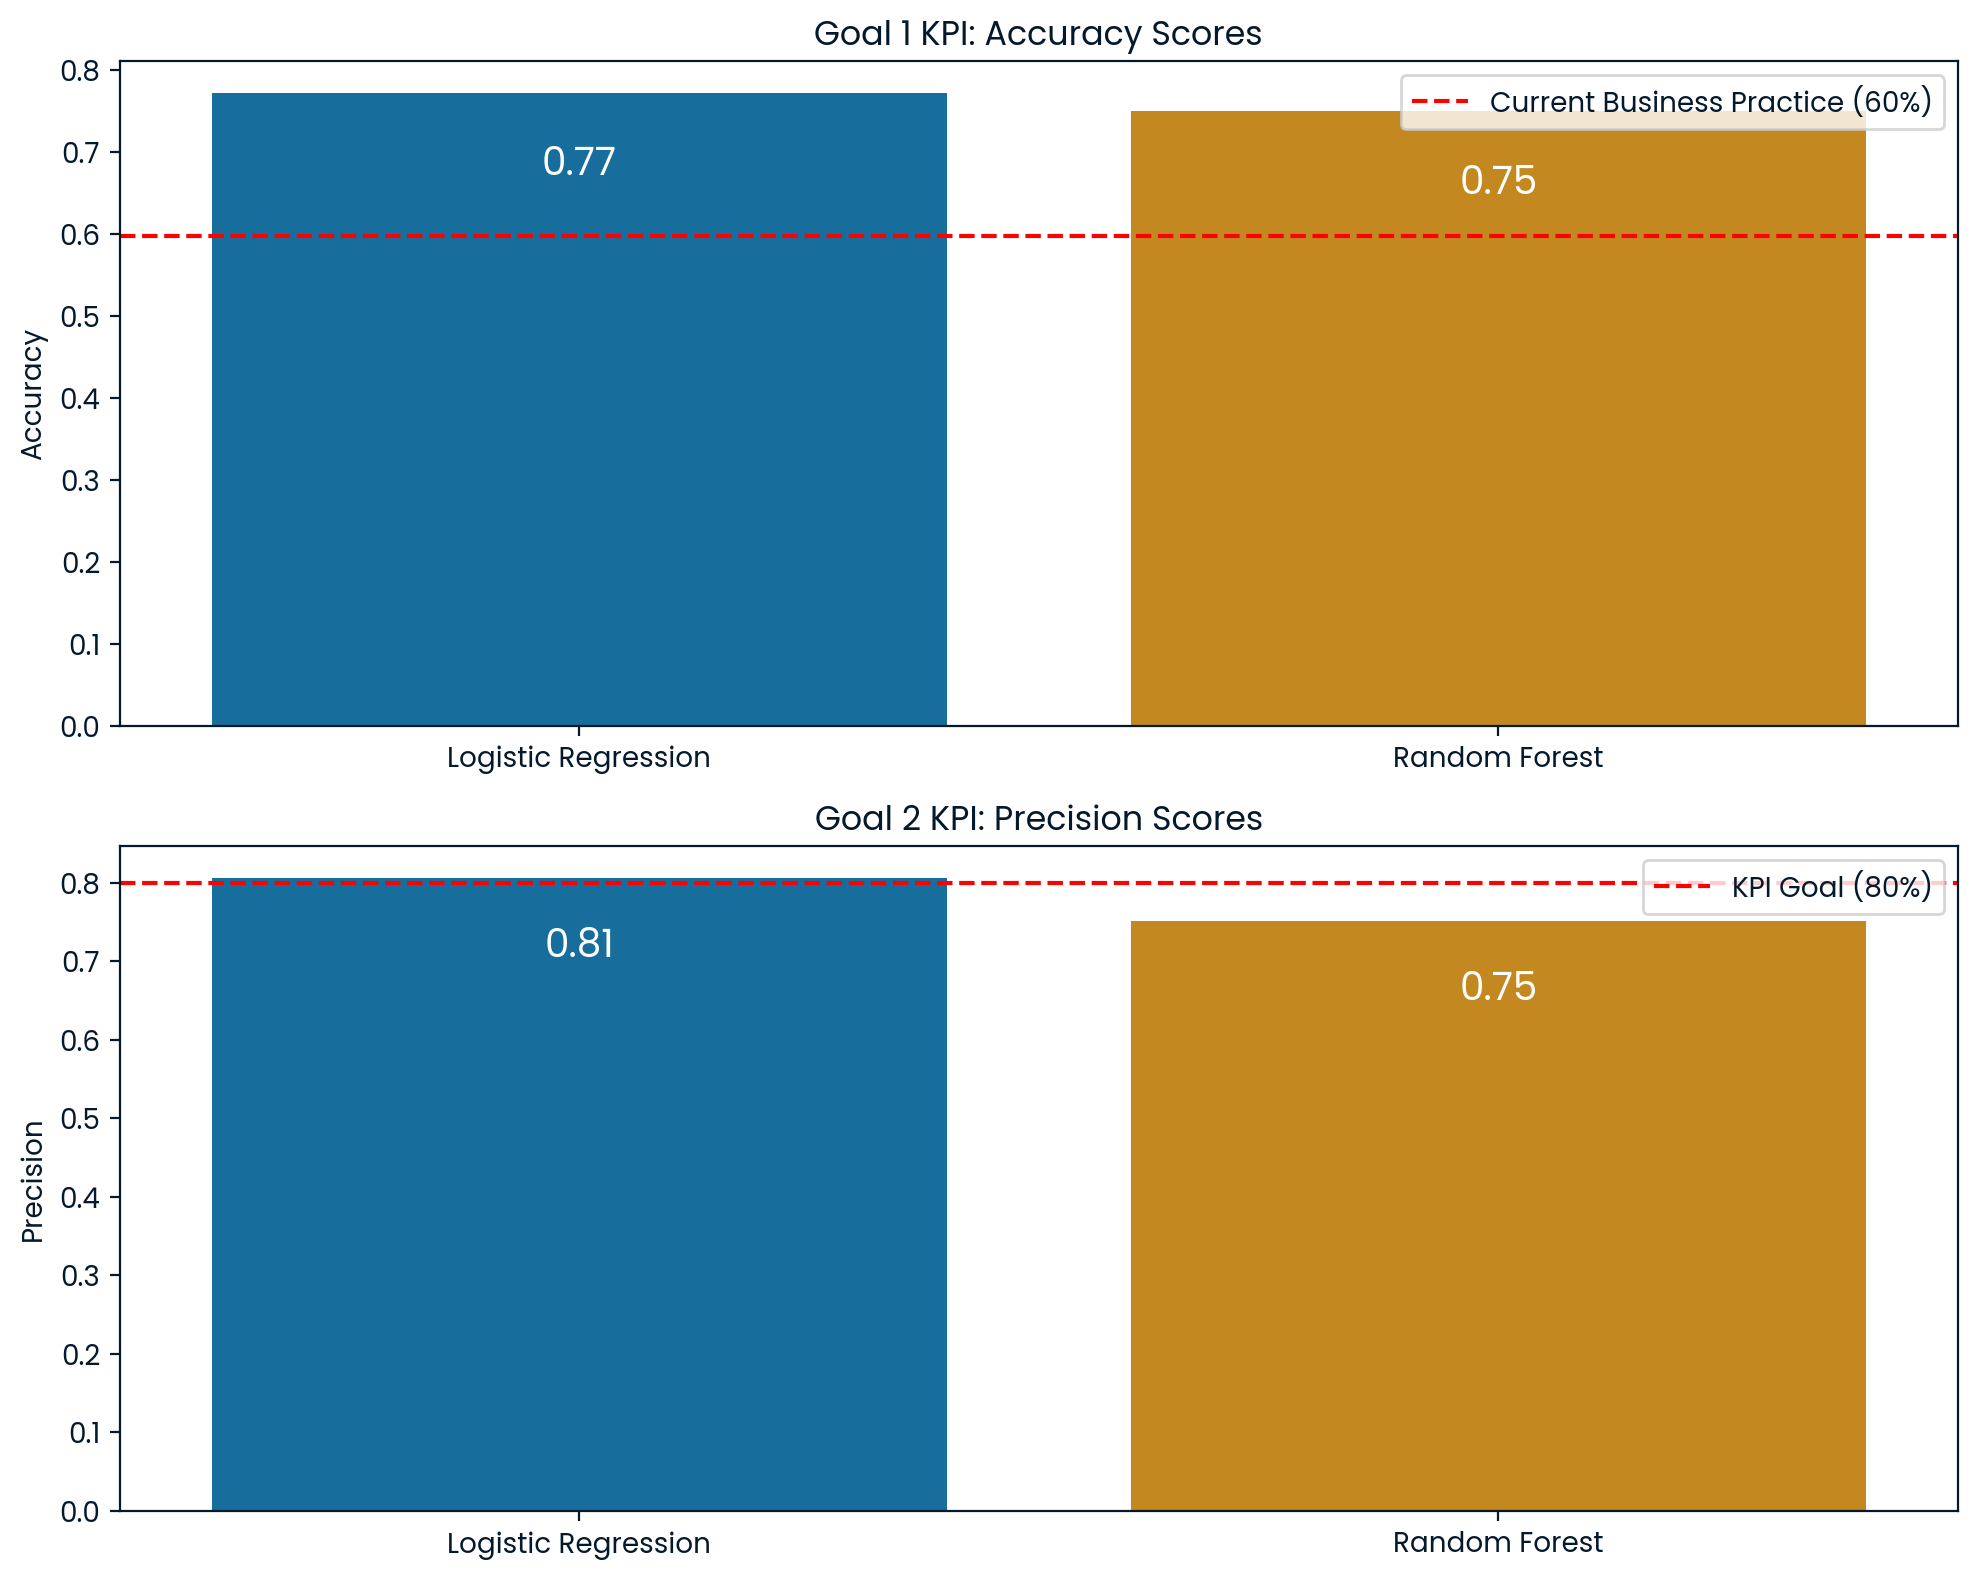

In [45]:
models = list(results.keys())
precision_scores = [results[model]['Precision'] for model in models]
accuracy_scores = [results[model]['Accuracy'] for model in models]


fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# accuracy
sns.barplot(x=models, y=accuracy_scores, palette='colorblind', ax=axs[0])
axs[0].axhline(y=0.598, color='r', linestyle='--', label='Current Business Practice (60%)')
axs[0].set_title('Goal 1 KPI: Accuracy Scores')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
for i, score in enumerate(accuracy_scores):
    axs[0].text(i, score - 0.100, f'{score:.2f}', color='white', ha='center', fontsize= 14)

# precision
sns.barplot(x=models, y=precision_scores, palette='colorblind', ax=axs[1])
axs[1].axhline(y=0.8, color='r', linestyle='--', label='KPI Goal (80%)')
axs[1].set_title('Goal 2 KPI: Precision Scores')
axs[1].set_ylabel('Precision')
axs[1].legend()
for i, score in enumerate(precision_scores):
    axs[1].text(i, score - 0.100, f'{score:.2f}', color='white', ha='center', fontsize= 14)

plt.tight_layout()
plt.show()

# 6. Recommendations

To predict recipes that produce a state of high traffic on the website, I recommend deploying the **Logistic Regression Model** into production. This model is capable of predicting high traffic with an accuracy of 81%, which will help the company consistently drive web traffic throughout the site.

To ensure the model is effective and continually improved, consider the following steps:

1. **Predictive Functionality:**
   - Implement functionality that allows for predictions of high traffic for individual recipes or batches of recipes. This can be integrated into the website’s recipe selection process.

2. **Monitor:**
   - Continuously monitor the model’s performance and update the recipe's high_traffic status with actual results. This will help in assessing accuracy and precision over time. If KPIs fall below the target, it should trigger a review to investigate and make necessary adjustments.

3. **Validate and Sanitize Input:**
   - Ensure that the database storing recipe data validates and sanitizes data upon input to maintain consistency across the company. Although data validation and cleaning were performed for modeling, similar issues could arise in the future without stringent input validation and sanitation.

4. **Provide More Data:**
   - Consider incorporating additional data such as the recipe’s name, 'Time to make,' and 'Cost per serving.' Splitting the time into prep time and cook time could also be valuable. Labeling recipes based on diet (e.g., gluten-free, vegetarian, vegan) might enhance prediction accuracy, especially given the importance of the 'Vegetable' category in predicting high traffic. Additional data could help the model learn new patterns and improve its predictions.

5. **Continuously Improve:**
   - Establish a regular review interval for the model to ensure it remains up-to-date and effective. Initially, review the model every few months, and adjust the review frequency to every 6-12 months as the model matures. Incorporate new data and monitor performance to ensure it meets business KPIs and improves over time.

6. **Document:**
   - Thoroughly document the model’s usage, performance metrics, and review processes. This documentation will serve as a reference for future use and help in maintaining a clear understanding of the model’s functionality and evaluation criteria.
